# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

None

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

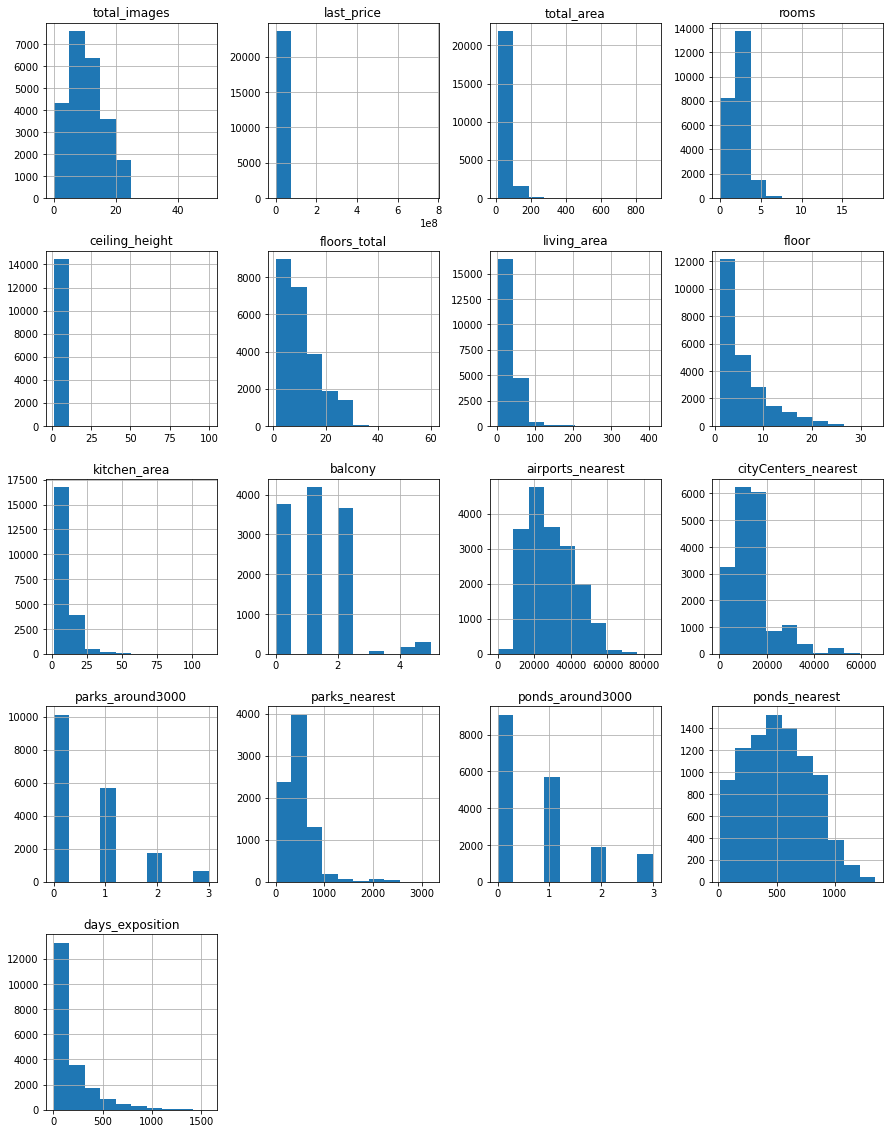

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
data=pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
display(data.head())
display(data.info())
display(data.isna().sum())
data.hist(figsize=(15, 20));

Добовляем нам нужные библиотеки и изучаем данные

### Предобработка данных


In [2]:
data['balcony']=data['balcony'].fillna(0)
data=data.dropna(subset=['floors_total'])
data=data.dropna(subset=['locality_name'])
data['last_price']=data['last_price'].astype('int')
data['is_apartment']=data['is_apartment'].fillna(False).astype('bool')
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'])
# data['days_exposition'] = data['days_exposition'].astype('int')
display(data.isna().sum())
display(data.info())


total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9084
floors_total                0
living_area              1865
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2222
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition          3171
dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  int64         
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        14481 non-null  float64       
 6   floors_total          23565 non-null  float64       
 7   living_area           21700 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          21343 non-null  float64       
 13  balcony         

None

In [3]:
data['ceiling_height'].count()

14481

Убираем незначительные пропуски или пропуски которые не влияют на статистику и меняем формат ячеек

In [4]:

# пропущенные значения бары

def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), rot = -5, legend = False, fontsize = 16)
            .set_title('Пример' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) или произошла ошибка в первой части функции ')

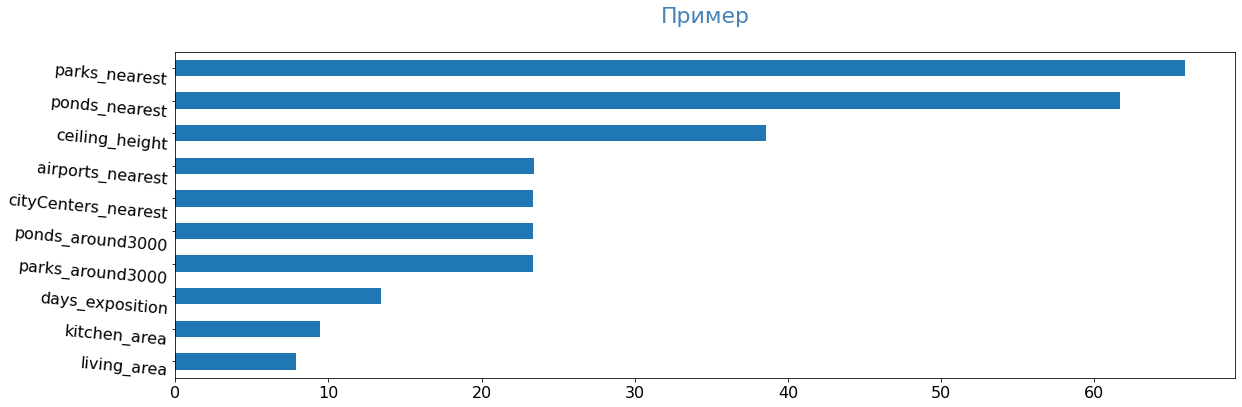

In [5]:
pass_value_barh(data)

Считаем уникальные данные

In [6]:
data['locality_name'].unique()


array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Меняем названия поселений для групировки

In [7]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')
data['locality_name'] = data['locality_name'].str.replace('городской поселок', 'поселок городского типа')
data.groupby(['locality_name'])['locality_name'].count()

locality_name
Бокситогорск             16
Волосово                 36
Волхов                  111
Всеволожск              398
Выборг                  237
                       ... 
село Путилово             2
село Рождествено          3
село Русско-Высоцкое      9
село Старая Ладога        2
село Шум                  1
Name: locality_name, Length: 323, dtype: int64

In [8]:
data.locality_name.nunique()

323

Проверяем есть ли пустые значения

In [9]:
data['locality_name'].isna().sum()

0

Проверяем высоту потолков

In [10]:
data['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

In [11]:
# Используем метод describe() для получение статистических значений
data['ceiling_height'].reset_index().describe(percentiles=[0.1, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99]).T

,count,mean,std,min,10%,50%,60%,70%,80%,90%,95%,99%,max
index,23565.0,11846.826183,6842.594114,0.0,2364.4,11850.00,14219.4,16587.80,18956.20,21327.60,22511.8,23460.360,23698.0
ceiling_height,14481.0,2.771283,1.261983,1.0,2.5,2.65,2.7,2.75,2.87,3.06,3.3,3.822,100.0


<AxesSubplot:>

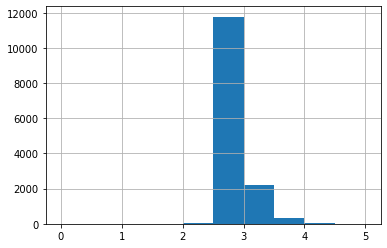

In [12]:
data['ceiling_height'].hist(bins=10, range=(0,5))

<AxesSubplot:>

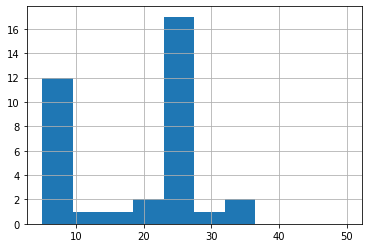

In [13]:
data['ceiling_height'].hist(bins=10, range=(5,50))

In [14]:
ceiling_less_than_two = data['ceiling_height'][data['ceiling_height'] < 2].count()

In [15]:
ceiling_less_than_two

3

In [16]:
ceiling_more_than_five = data['ceiling_height'][data['ceiling_height'] > 5].count()

In [17]:
ceiling_more_than_five

36

In [18]:
data = data.loc[(data['ceiling_height'].isna()) | (data['ceiling_height']>= 2)\
                & (data['ceiling_height']<=5)]

<AxesSubplot:>

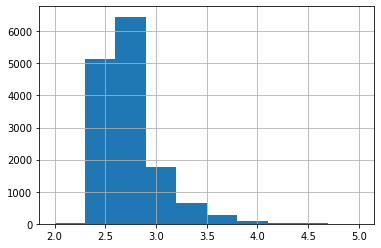

In [19]:
data['ceiling_height'].hist(bins=10)

Удаляем подозрительно высокие и подозрительно низкие потолки(удалил так как было мало значений и на показания не влияют)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23526 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23526 non-null  int64         
 1   last_price            23526 non-null  int64         
 2   total_area            23526 non-null  float64       
 3   first_day_exposition  23526 non-null  datetime64[ns]
 4   rooms                 23526 non-null  int64         
 5   ceiling_height        14442 non-null  float64       
 6   floors_total          23526 non-null  float64       
 7   living_area           21663 non-null  float64       
 8   floor                 23526 non-null  int64         
 9   is_apartment          23526 non-null  bool          
 10  studio                23526 non-null  bool          
 11  open_plan             23526 non-null  bool          
 12  kitchen_area          21313 non-null  float64       
 13  balcony         

In [21]:
np.mean(data['ceiling_height'])

2.7251488713474585

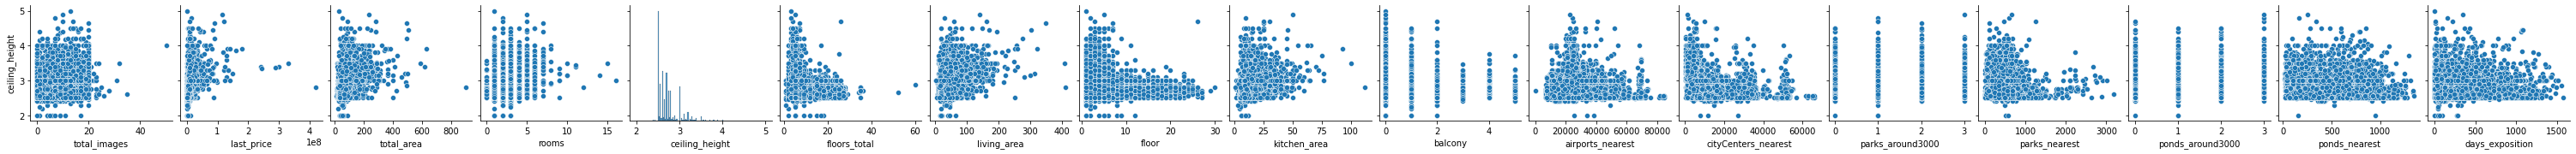

In [22]:
d=data[data['ceiling_height'].notnull()].select_dtypes(['int', 'float'])
sns.pairplot(data=d,
            x_vars=d.columns,
            y_vars=['ceiling_height'])

<AxesSubplot:>

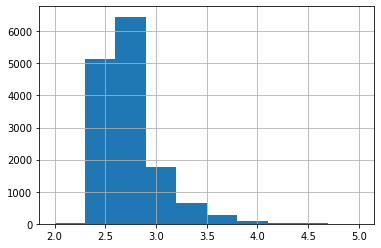

In [23]:
data['ceiling_height'].hist(bins=10)

In [24]:
data.shape[0]

23526

Проверяем анамальное количество этажей

In [25]:
data['floors_total'].unique()

array([16., 11.,  5., 14., 12., 26., 24., 27.,  9.,  6., 17., 25.,  3.,
       23., 19., 18.,  4., 22.,  8.,  2., 10.,  7., 13., 15., 20., 28.,
       36., 21., 35., 34., 60.,  1., 29., 33., 52.])

Убираем дома выше 35 этажей (так как в Санкт-Петербурге выше 35 этажей домов нет)

In [26]:
data=data[(data['floors_total']<=35)]
data.sort_values(by='floors_total', ascending=False)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
9579,9,3450000,24.8,2019-02-01,0,2.68,35.0,16.0,17,False,...,NaN,2.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,45.0
1060,10,5200000,50.0,2015-11-06,2,NaN,35.0,39.0,15,False,...,20.5,2.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,281.0
18629,20,5700000,54.0,2017-12-08,1,NaN,35.0,21.0,31,False,...,18.0,0.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,128.0
4855,12,5500000,50.0,2017-06-22,1,2.80,35.0,22.0,4,False,...,13.0,0.0,Санкт-Петербург,18627.0,20339.0,1.0,609.0,3.0,145.0,537.0
8496,20,7500000,73.3,2017-05-18,3,NaN,35.0,28.0,27,False,...,23.1,0.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,250.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23498,7,1600000,54.0,2016-12-26,2,2.30,1.0,33.0,1,False,...,3.5,0.0,Высоцк,NaN,NaN,NaN,NaN,NaN,NaN,281.0
17744,8,2300000,50.9,2017-08-09,2,NaN,1.0,30.0,1,False,...,7.0,0.0,поселок Суйда,NaN,NaN,NaN,NaN,NaN,NaN,454.0
9752,16,850000,62.0,2018-11-10,2,NaN,1.0,31.0,1,False,...,11.0,0.0,деревня Сижно,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22550,2,5800000,115.0,2017-09-12,2,NaN,1.0,40.0,1,False,...,14.0,0.0,Сестрорецк,54331.0,35394.0,0.0,NaN,0.0,NaN,124.0


Проверяем аномалии в жилой площади

In [27]:
data['living_area'].unique()

array([51.  , 18.6 , 34.3 , ..., 31.65, 13.59, 42.55])

In [28]:
data['living_area'].describe(percentiles=[0.3, 0.5, 0.9, 0.99])#проверяем методом describe

count    21659.000000
mean        34.439745
std         22.000426
min          2.000000
30%         20.000000
50%         30.000000
90%         55.000000
99%        119.668000
max        409.700000
Name: living_area, dtype: float64

<AxesSubplot:>

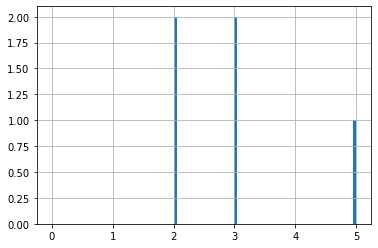

In [29]:
data['living_area'].hist(bins=100, range=(0,5))

<AxesSubplot:>

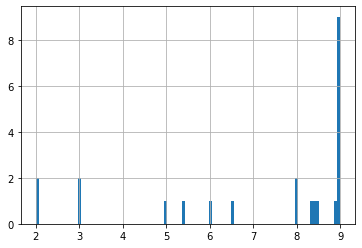

In [30]:
data['living_area'].hist(bins=100, range=(2,9))

In [31]:
data = data.loc[(data['living_area'].isna()) | (data['living_area']>= 9)\
                & (data['living_area']<=140)]

In [32]:
data.shape[0]

23362

<AxesSubplot:>

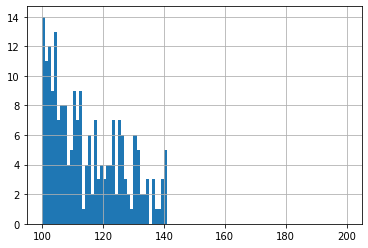

In [33]:
data['living_area'].hist(bins=100, range=(100, 200))

Удаляем слишком большие площади и слишком маленькие 

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23362 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23362 non-null  int64         
 1   last_price            23362 non-null  int64         
 2   total_area            23362 non-null  float64       
 3   first_day_exposition  23362 non-null  datetime64[ns]
 4   rooms                 23362 non-null  int64         
 5   ceiling_height        14333 non-null  float64       
 6   floors_total          23362 non-null  float64       
 7   living_area           21499 non-null  float64       
 8   floor                 23362 non-null  int64         
 9   is_apartment          23362 non-null  bool          
 10  studio                23362 non-null  bool          
 11  open_plan             23362 non-null  bool          
 12  kitchen_area          21162 non-null  float64       
 13  balcony         

In [35]:
data.sort_values(by='living_area', ascending=False)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
21923,10,115490000,235.00,2017-04-09,5,4.90,5.0,140.0,5,False,...,50.0,0.0,Санкт-Петербург,22777.0,1328.0,3.0,652.0,3.0,253.0,351.0
907,2,19500000,211.40,2018-02-22,6,NaN,7.0,140.0,4,False,...,15.2,1.0,Санкт-Петербург,20581.0,2279.0,2.0,251.0,3.0,70.0,125.0
13729,14,20300000,170.00,2017-11-26,3,3.40,6.0,140.0,4,False,...,25.0,1.0,Санкт-Петербург,26273.0,4975.0,3.0,388.0,1.0,189.0,104.0
12567,19,22000000,180.60,2015-03-25,5,2.80,7.0,140.0,2,False,...,30.0,0.0,Санкт-Петербург,24324.0,5038.0,0.0,NaN,0.0,NaN,NaN
12549,10,14500000,165.00,2017-02-02,6,NaN,6.0,140.0,4,False,...,19.0,0.0,Санкт-Петербург,20561.0,1827.0,3.0,427.0,3.0,251.0,180.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23642,14,5950000,80.30,2018-07-03,3,2.70,12.0,NaN,5,False,...,NaN,0.0,Колпино,27933.0,33719.0,0.0,NaN,2.0,562.0,60.0
23663,12,6400000,88.00,2018-01-12,4,2.55,10.0,NaN,1,False,...,NaN,0.0,Санкт-Петербург,33642.0,13943.0,0.0,NaN,2.0,844.0,59.0
23670,9,2450000,45.60,2018-02-08,1,2.80,9.0,NaN,2,False,...,NaN,0.0,поселок городского типа Синявино,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23679,0,2500000,35.00,2017-12-08,1,NaN,9.0,NaN,4,False,...,NaN,0.0,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN,45.0


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23362 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23362 non-null  int64         
 1   last_price            23362 non-null  int64         
 2   total_area            23362 non-null  float64       
 3   first_day_exposition  23362 non-null  datetime64[ns]
 4   rooms                 23362 non-null  int64         
 5   ceiling_height        14333 non-null  float64       
 6   floors_total          23362 non-null  float64       
 7   living_area           21499 non-null  float64       
 8   floor                 23362 non-null  int64         
 9   is_apartment          23362 non-null  bool          
 10  studio                23362 non-null  bool          
 11  open_plan             23362 non-null  bool          
 12  kitchen_area          21162 non-null  float64       
 13  balcony         

In [37]:
# check
data.shape[0]

23362

Проверем уникальные значения в первых публикациях

In [38]:
data['first_day_exposition'].unique()

array(['2019-03-07T00:00:00.000000000', '2018-12-04T00:00:00.000000000',
       '2015-08-20T00:00:00.000000000', ...,
       '2014-12-29T00:00:00.000000000', '2016-09-12T00:00:00.000000000',
       '2015-07-19T00:00:00.000000000'], dtype='datetime64[ns]')

Убираем время так как они не отражены

In [39]:
data['first_day_exposition']=pd.to_datetime(data['first_day_exposition'])

In [40]:
data['first_day_exposition'].isna().sum()#проверим пустые значения

0

Проверем уникальные значения в комнатах

In [41]:
data['rooms'].unique()

array([ 3,  1,  2,  4,  5,  6,  0,  7, 11,  8,  9])

In [42]:
data['rooms'].describe(percentiles=[0.3, 0.5, 0.9, 0.99])#проверяем методом describe

count    23362.000000
mean         2.043875
std          1.008547
min          0.000000
30%          1.000000
50%          2.000000
90%          3.000000
99%          5.000000
max         11.000000
Name: rooms, dtype: float64

<AxesSubplot:>

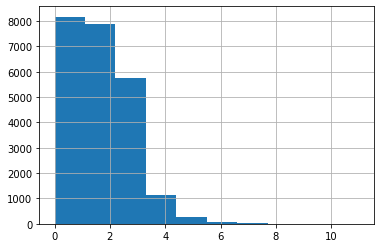

In [43]:
data['rooms'].hist(bins=10, range=(0, 11))

In [44]:
data=data[(data['rooms']<=6)]# удоляем квартиры более 6 комнат

In [45]:
data.sort_values(by='rooms', ascending=False)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
10190,17,11700000,182.0,2017-05-31,6,3.50,5.0,127.00,4,False,...,23.0,0.0,Санкт-Петербург,20765.0,1727.0,1.0,469.0,3.0,272.0,313.0
11409,20,9990000,120.0,2016-03-15,6,NaN,16.0,96.00,3,False,...,18.0,0.0,Санкт-Петербург,33254.0,14353.0,0.0,NaN,0.0,NaN,323.0
10851,19,17500000,160.0,2018-08-24,6,3.17,5.0,112.70,3,False,...,15.4,1.0,Санкт-Петербург,19620.0,3510.0,2.0,190.0,1.0,564.0,158.0
13224,8,16900000,170.0,2019-03-27,6,4.50,4.0,115.50,4,False,...,16.0,0.0,Санкт-Петербург,26619.0,5579.0,0.0,NaN,1.0,281.0,NaN
17534,6,21000000,154.0,2018-12-18,6,3.51,5.0,99.10,1,False,...,24.7,0.0,Санкт-Петербург,20215.0,1658.0,3.0,328.0,3.0,132.0,116.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12737,10,2300000,20.5,2018-07-01,0,NaN,25.0,15.50,13,False,...,NaN,0.0,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,30.0
4971,11,4300000,29.3,2017-07-14,0,NaN,20.0,19.03,17,False,...,NaN,2.0,Санкт-Петербург,20802.0,12554.0,1.0,526.0,0.0,NaN,7.0
7256,16,3500000,29.2,2017-04-16,0,2.64,16.0,16.70,3,False,...,NaN,2.0,Санкт-Петербург,17693.0,12516.0,0.0,NaN,0.0,NaN,28.0
4319,13,3600000,27.0,2017-12-07,0,2.70,21.0,20.50,16,False,...,NaN,0.0,Санкт-Петербург,10788.0,13087.0,0.0,NaN,0.0,NaN,323.0


In [46]:
data.shape[0]

23328

Проверяем площадь 

In [47]:
data['total_area'].unique()

array([108.  ,  40.4 ,  56.  , ...,  66.86, 133.81,  76.75])

In [48]:
data['total_area'].describe(percentiles=[0.3, 0.5, 0.9, 0.99])#проверяем методом describe

count    23328.000000
mean        58.647222
std         28.752292
min         12.000000
30%         42.000000
50%         52.000000
90%         91.400000
99%        166.746000
max        500.000000
Name: total_area, dtype: float64

<AxesSubplot:>

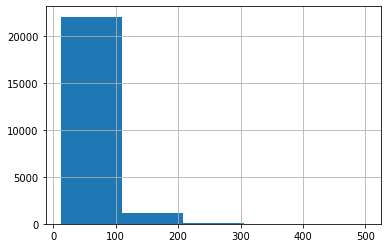

In [49]:
data['total_area'].hist(bins=5)

<AxesSubplot:>

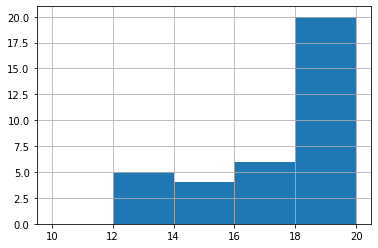

In [50]:
data['total_area'].hist(bins=5, range=(10,20))

<AxesSubplot:>

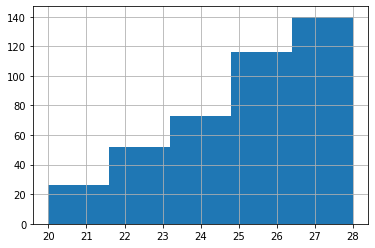

In [51]:
data['total_area'].hist(bins=5, range=(20,28))

In [52]:
total_area_min = data['total_area'][data['total_area'] < 20].count()

In [53]:
total_area_min

27

<AxesSubplot:>

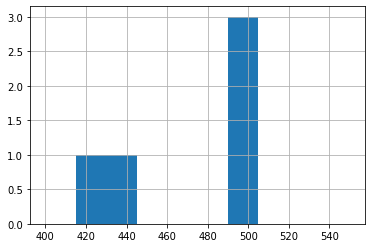

In [54]:
data['total_area'].hist(bins=10, range=(400,550))

In [55]:
total_area_max = data['total_area'][data['total_area'] >250].count()

In [56]:
total_area_max

26

In [57]:
(((total_area_min + total_area_max)/23699*100),'%')

(0.22363812819106293, '%')

In [58]:
data = data.loc[(data['total_area'].isna()) | (data['total_area']>= 20)\
                & (data['total_area']<=250)]

In [59]:
data.shape[0]

23275

Сделаем корреляцию Пирсона чтоб понять зависемость

In [60]:
data['total_area'].corr(data['living_area'])

0.9232148015501188

In [61]:
data['rooms'].corr(data['living_area'])

0.8706385306359568

есть прямая зависимость от общей площади и от комнат

In [62]:
data['living_area'].isna().sum()#проверяем пропущенные значения   

1834

Пишем функцию для более точно подбора пропусков

In [63]:
def l_area(area):
    try:
        if 0<=area<=30:
            return 'A'#комната, студия
        elif 31< area <=50:
            return 'B'#студия, однокомнатая
        elif 51<area <=70:
            return 'C'#2-3 комнаты
        elif 71< area <=95:
            return 'D'#3-4 комнаты
        elif 96< area <=125:
            return 'E'#4-5 комнат
        elif  area > 126:
            return 'F'#5 и более комнат
    except:
        pass

In [64]:
data['l_area'] = data['total_area'].apply(l_area)# добовляем столбец в таблицу
data.pivot_table(index='l_area', values = 'living_area', aggfunc = 'median').reset_index() #меняем пропушеные значения и обнуляем индексы

,l_area,living_area
0,A,16.40
1,B,19.00
2,C,35.00
3,D,47.70
4,E,62.75
5,F,88.20


Проверяем кухни на аномалию

In [65]:
data['kitchen_area'].unique()

array([ 25.  ,  11.  ,   8.3 ,    nan,  41.  ,   9.1 ,  14.4 ,  18.9 ,
         8.81,   6.5 ,   8.5 ,   6.  ,   9.  ,   5.2 ,   8.  ,   7.6 ,
         5.6 ,  12.  ,   5.7 ,   6.1 ,  19.6 ,  15.  ,   7.  ,   9.2 ,
        11.7 ,  13.4 ,  17.  ,   6.3 ,  11.6 ,   8.8 ,  10.  ,  17.6 ,
         7.5 ,   9.5 ,  50.  ,  15.5 ,  10.7 ,  11.1 ,  20.  ,  11.9 ,
        16.  ,   5.3 ,  11.5 ,   7.2 ,   6.2 ,  10.4 ,   7.1 ,   4.9 ,
         7.3 ,  11.95,  10.2 ,   6.4 ,   5.5 ,  13.  ,   8.4 ,  23.6 ,
        10.8 ,  18.3 ,   5.  ,   8.2 ,  24.  ,  23.8 ,   6.6 ,  26.85,
        15.4 ,   7.8 ,  33.8 ,   5.4 ,  12.72,  12.2 ,  19.  ,  12.4 ,
         7.9 ,  10.3 ,   9.8 ,  17.5 ,  14.7 ,  20.91,  21.3 ,  10.6 ,
        10.9 ,   9.7 ,   7.7 ,  12.5 ,  11.4 ,   8.6 ,  11.24,  14.1 ,
        15.7 ,  13.29,  14.  ,  12.9 ,  12.7 ,  16.5 ,   9.36,  21.5 ,
        35.  ,  10.5 ,   8.7 ,  19.3 ,  21.4 ,  40.  ,  49.2 ,  11.52,
         8.9 ,   9.6 ,  30.  ,  14.2 ,   8.1 ,  10.44,   4.5 ,  16.3 ,
      

In [66]:
data['kitchen_area'].describe(percentiles=[0.3, 0.5, 0.9, 0.99])#проверяем методом describe

count    21112.000000
mean        10.407260
std          5.484321
min          1.300000
30%          7.700000
50%          9.000000
90%         15.300000
99%         33.545000
max        107.000000
Name: kitchen_area, dtype: float64

<AxesSubplot:>

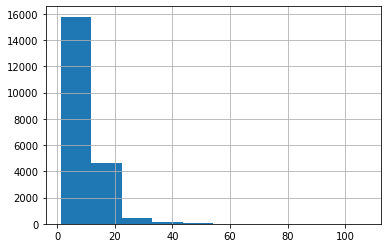

In [67]:
data['kitchen_area'].hist(bins=10)

<AxesSubplot:>

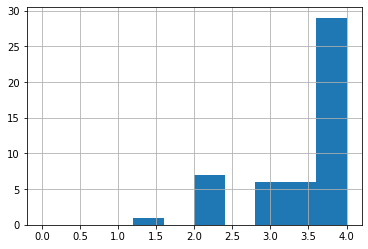

In [68]:
data['kitchen_area'].hist(bins=10, range=(0,4))

In [69]:
kitchen_area_min = data['kitchen_area'][data['kitchen_area'] < 4].count()

In [70]:
kitchen_area_min

24

<AxesSubplot:>

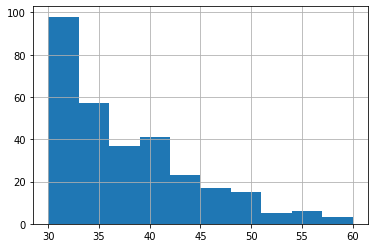

In [71]:
data['kitchen_area'].hist(bins=10, range=(30,60))

In [72]:
kitchen_area_max = data['kitchen_area'][data['kitchen_area'] > 30].count()

In [73]:
kitchen_area_max

264

In [74]:
(((kitchen_area_min + kitchen_area_max)/23699*100),'%')

(1.215241149415587, '%')

Удаляем выбросы 

<AxesSubplot:>

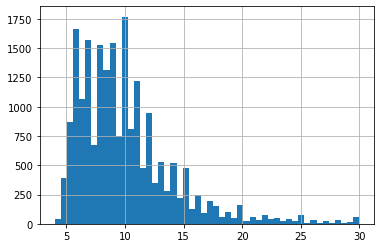

In [75]:
data = data.loc[(data['kitchen_area'].isna()) | (data['kitchen_area']>= 4)\
                & (data['kitchen_area']<=30)]# удоляем кухни 
data.sort_values(by='kitchen_area', ascending=False)
data['kitchen_area'].hist(bins=50)

In [76]:
data['kitchen_area'].isna().sum()#проверяем пустые значения

2163

In [77]:
data['kitchen_area'].reset_index().describe(percentiles=[0.1, 0.5, 0.7, 0.9, 0.98]).T

,count,mean,std,min,10%,50%,70%,90%,98%,max
index,22987.0,11854.027711,6839.538791,0.0,2369.6,11864.0,16588.2,21327.4,23229.28,23698.0
kitchen_area,20824.0,10.027094,4.097845,4.0,6.0,9.0,11.0,15.0,22.40,30.0


In [78]:
# Заменим на 0 если тип квартиры студио
data.loc[data['studio'] == True, 'kitchen_area'] = data.loc[data['studio'] == True, 'kitchen_area'].fillna(0)

In [79]:
# Проверяем, есть ли у студий кухни. Нет. 
data.groupby('studio')['kitchen_area'].mean()

studio
False    10.027094
True      0.000000
Name: kitchen_area, dtype: float64

In [80]:
# Заменим пропуски на среднюю площадь кухни в разрезе категорий
for i in data['l_area'].unique(): 
    data.loc[(data['l_area'] == i) & (data['kitchen_area'].isna()), 'kitchen_area'] = \
    data.loc[(data['l_area'] == i), 'kitchen_area'].median()

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22987 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22987 non-null  int64         
 1   last_price            22987 non-null  int64         
 2   total_area            22987 non-null  float64       
 3   first_day_exposition  22987 non-null  datetime64[ns]
 4   rooms                 22987 non-null  int64         
 5   ceiling_height        14071 non-null  float64       
 6   floors_total          22987 non-null  float64       
 7   living_area           21167 non-null  float64       
 8   floor                 22987 non-null  int64         
 9   is_apartment          22987 non-null  bool          
 10  studio                22987 non-null  bool          
 11  open_plan             22987 non-null  bool          
 12  kitchen_area          22899 non-null  float64       
 13  balcony         

<AxesSubplot:>

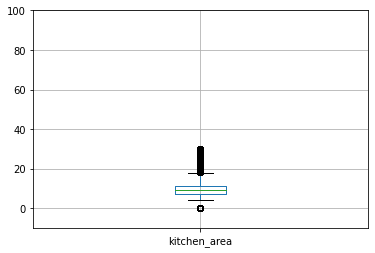

In [82]:
plt.ylim(-10, 100)
data.boxplot('kitchen_area')

Выбросов больше нет 

In [83]:
data['last_price'].isna().sum()

0

In [84]:
data['last_price'].unique()

array([13000000,  3350000,  5196000, ...,  6151120, 21400000, 11475000])

<AxesSubplot:>

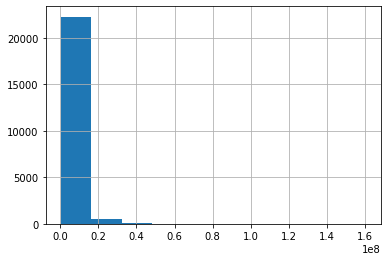

In [85]:
data['last_price'].hist(bins=10)

<AxesSubplot:>

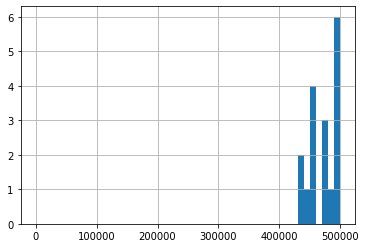

In [86]:
data['last_price'].hist(bins=50, range=(0,500000))

In [87]:
last_price_min = data['last_price'][data['last_price'] < 500000].count()

In [88]:
last_price_min

13

<AxesSubplot:>

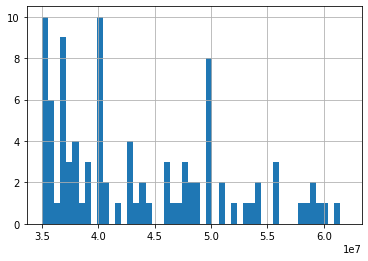

In [89]:
data['last_price'].hist(bins=50, range=(35000000,62000000))

In [90]:
last_price_max = data['last_price'][data['last_price'] > 35000000].count()

In [91]:
last_price_max

115

In [92]:
(((last_price_min + last_price_max)/23699*100),'%')

(0.5401071775180387, '%')

In [93]:
data['last_price'].reset_index().describe(percentiles=[0.1, 0.5, 0.7, 0.9, 0.98]).T

,count,mean,std,min,10%,50%,70%,90%,98%,max
index,22987.0,1.185403e+04,6.839539e+03,0.0,2369.6,11864.0,16588.2,21327.4,23229.28,23698.0
last_price,22987.0,5.867847e+06,5.413408e+06,430000.0,2490000.0,4600000.0,6000000.0,10000000.0,19719600.00,159984000.0


In [94]:
#Удаляем выбросы согласно 98 квантилю
data = data[(data['last_price'] > 500000) & (data['last_price'] < 35000000)]

In [95]:
data.shape[0]

22847

In [96]:
data['open_plan'].isna().sum()

0

In [97]:
data['open_plan'].unique()

array([False,  True])

In [98]:
data['studio'].isna().sum()

0

In [99]:
data['studio'].unique()

array([False,  True])

In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22847 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22847 non-null  int64         
 1   last_price            22847 non-null  int64         
 2   total_area            22847 non-null  float64       
 3   first_day_exposition  22847 non-null  datetime64[ns]
 4   rooms                 22847 non-null  int64         
 5   ceiling_height        13994 non-null  float64       
 6   floors_total          22847 non-null  float64       
 7   living_area           21048 non-null  float64       
 8   floor                 22847 non-null  int64         
 9   is_apartment          22847 non-null  bool          
 10  studio                22847 non-null  bool          
 11  open_plan             22847 non-null  bool          
 12  kitchen_area          22759 non-null  float64       
 13  balcony         

In [101]:
# Показатели о кол-ве объявлений в датасете, минимальных и максимальных значениях 
# в выбранных параметрах о продаже квартир
# сырые данные

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max', 'median'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"22,847.00","22,847.00","13,994.00","19,843.00","22,847.00","21,048.00","22,759.00","22,847.00","22,847.00"
min,0.00,20.00,2.00,1.00,"520,000.00",9.00,0.00,1.00,1.00
max,6.00,250.00,5.00,"1,580.00","34,878,556.00",140.00,30.00,33.00,35.00
median,2.00,51.00,2.65,94.00,"4,590,000.00",30.00,9.00,4.00,9.00


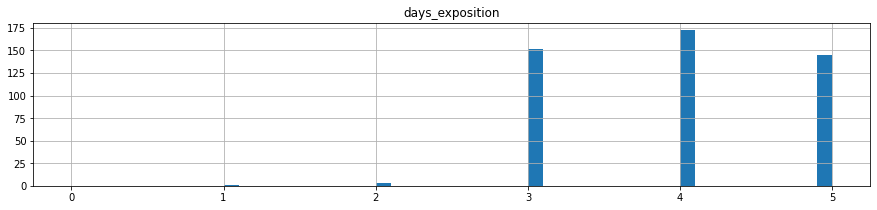

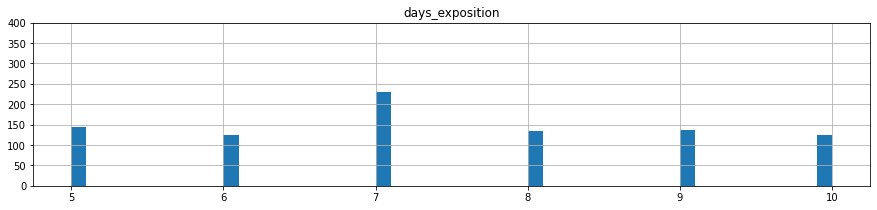

In [102]:
data.hist(column = 'days_exposition', bins = 50, figsize = (15,3), range = (0,5));

data.hist(column = 'days_exposition', bins = 50, figsize = (15,3), range = (5,10))
plt.ylim(0, 400);

<AxesSubplot:>

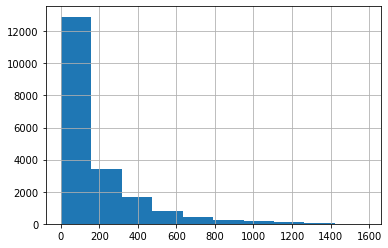

In [103]:
data['days_exposition'].hist(bins=10)

<AxesSubplot:>

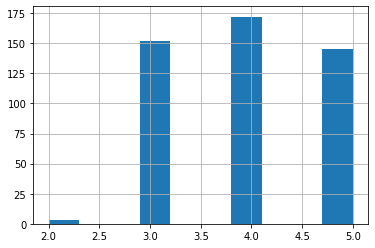

In [104]:
data['days_exposition'].hist(bins=10, range = (2, 5))

In [105]:
days_exposition_min = data['days_exposition'][data['days_exposition'] <3].count()

In [106]:
days_exposition_min

4

<AxesSubplot:>

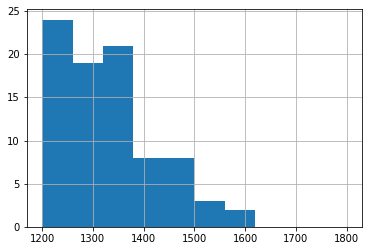

In [107]:
data['days_exposition'].hist(bins=10, range = (1200, 1800))

In [108]:
days_exposition_max = data['days_exposition'][data['days_exposition'] >1200 ].count()

In [109]:
days_exposition_max

84

In [110]:
(((days_exposition_min + days_exposition_max)/23699*100),'%')

(0.3713236845436516, '%')

In [111]:
data[data['days_exposition']> 0].describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,19843.000000,1.984300e+04,19843.000000,19843.000000,11669.000000,19843.000000,18227.000000,19843.000000,19764.000000,19843.000000,15235.000000,15254.000000,15254.000000,6555.000000,15254.000000,7467.000000,19843.000000
mean,9.574913,5.427366e+06,56.071250,1.978531,2.706297,10.917502,32.063497,5.985083,9.785735,0.596533,28890.898654,14508.847057,0.583388,493.499924,0.740527,525.243070,178.427405
std,5.618420,3.606841e+06,24.092109,0.957805,0.248190,6.640031,16.144164,4.940548,3.889505,0.948631,12823.680534,8536.063916,0.783585,344.803730,0.918462,276.868674,217.091594
min,0.000000,5.200000e+05,20.000000,0.000000,2.000000,1.000000,9.000000,1.000000,0.000000,0.000000,0.000000,208.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.390000e+06,39.200000,1.000000,2.500000,5.000000,18.200000,2.000000,7.000000,0.000000,18386.500000,9857.000000,0.000000,288.000000,0.000000,307.000000,45.000000
50%,9.000000,4.500000e+06,50.000000,2.000000,2.650000,9.000000,29.700000,4.000000,9.000000,0.000000,26911.000000,13277.000000,0.000000,456.000000,0.000000,511.000000,94.000000
75%,13.000000,6.300000e+06,66.000000,3.000000,2.790000,16.000000,40.800000,8.000000,11.300000,1.000000,37434.000000,16465.000000,1.000000,616.000000,1.000000,734.000000,228.000000
max,50.000000,3.487856e+07,250.000000,6.000000,5.000000,35.000000,140.000000,33.000000,30.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


<AxesSubplot:>

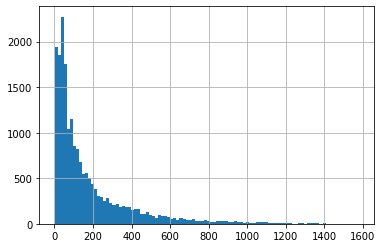

In [112]:
data['days_exposition'].hist(bins=100)

In [113]:
data = data.loc[(data['days_exposition'].isna()) | (data['days_exposition']>3)\
                & (data['days_exposition']<=1200)]

In [114]:
data.shape[0]

22759

In [115]:
# Показатели о кол-ве объявлений в датасете, минимальных и максимальных значениях 
# в выбранных параметрах о продаже квартир
# сырые данные

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max', 'median'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"22,759.00","22,759.00","13,931.00","19,755.00","22,759.00","20,967.00","22,671.00","22,759.00","22,759.00"
min,0.00,20.00,2.00,3.00,"520,000.00",9.00,0.00,1.00,1.00
max,6.00,250.00,5.00,"1,200.00","34,551,000.00",140.00,30.00,33.00,35.00
median,2.00,51.00,2.65,93.00,"4,580,000.00",30.00,9.00,4.00,9.00


In [116]:
# Добавим новый столбец days_exposition_duration и оборачиваем в функцию
def days_exposition_duration(row):
    if row['days_exposition'] < 22:
        return 'быстрые'
    elif row['days_exposition'] > 201:
        return 'долгие'
    return 'стандартные'

In [117]:
data['days_exposition_duration'] = data.apply(days_exposition_duration, axis=1)

In [118]:
data[['days_exposition','days_exposition_duration']].sample(3)

,days_exposition,days_exposition_duration
2116,5.0,быстрые
15574,335.0,долгие
7678,45.0,стандартные


In [119]:
# Показатели о кол-ве объявлений в датасете, минимальных и максимальных значениях 
# в выбранных параметрах о продаже квартир
# сырые данные

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max', 'median'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"22,759.00","22,759.00","13,931.00","19,755.00","22,759.00","20,967.00","22,671.00","22,759.00","22,759.00"
min,0.00,20.00,2.00,3.00,"520,000.00",9.00,0.00,1.00,1.00
max,6.00,250.00,5.00,"1,200.00","34,551,000.00",140.00,30.00,33.00,35.00
median,2.00,51.00,2.65,93.00,"4,580,000.00",30.00,9.00,4.00,9.00


In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22759 entries, 0 to 23698
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   total_images              22759 non-null  int64         
 1   last_price                22759 non-null  int64         
 2   total_area                22759 non-null  float64       
 3   first_day_exposition      22759 non-null  datetime64[ns]
 4   rooms                     22759 non-null  int64         
 5   ceiling_height            13931 non-null  float64       
 6   floors_total              22759 non-null  float64       
 7   living_area               20967 non-null  float64       
 8   floor                     22759 non-null  int64         
 9   is_apartment              22759 non-null  bool          
 10  studio                    22759 non-null  bool          
 11  open_plan                 22759 non-null  bool          
 12  kitchen_area      

In [121]:
try:
    df_check = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')
# если не получилось прочитать файл из локальной папки, то загружаем данные из сети
except:
    df_check = pd.read_csv('real_estate_data.csv', sep='\t')

In [122]:
df_check.rooms.value_counts().to_frame()

,rooms
1,8047
2,7940
3,5814
4,1180
5,326
0,197
6,105
7,59
8,12
9,8


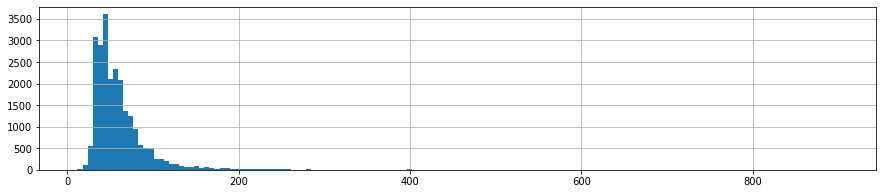

In [123]:
df_check.total_area.hist(bins = 150, figsize = (15,3));

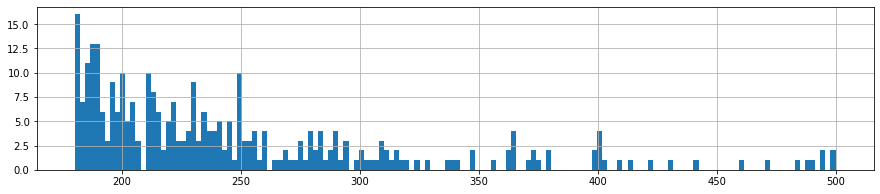

In [124]:
df_check.total_area.hist(bins = 150, figsize = (15,3), range = (180,500));

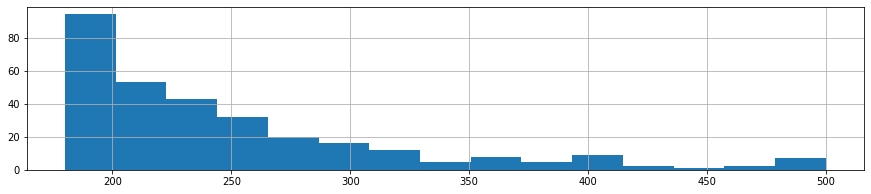

In [125]:
df_check.total_area.hist(bins = 15, figsize = (15,3), range = (180,500));

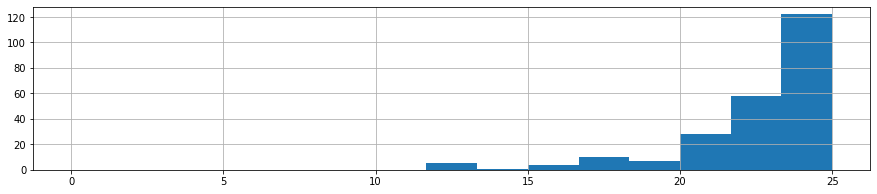

In [126]:
df_check.total_area.hist(bins = 15, figsize = (15,3), range = (0,25));

In [127]:
# Значения параметров объектов недвижимости на разных квантилях

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  
        'kitchen_area', 'floor',   'floors_total']]
    .quantile([0.0012, 0.01, .5, .99, .9988]) # выбираем размах в 0,9976 квантилей 
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
0.0012,0.00,21.89,2.38,3.00,"630,000.00",10.00,0.00,1.00,2.00
0.01,1.00,26.00,2.50,4.00,"1,030,000.00",13.10,5.00,1.00,2.00
0.5,2.00,51.00,2.65,93.00,"4,580,000.00",30.00,9.00,4.00,9.00
0.99,5.00,150.00,3.65,974.00,"22,000,000.00",92.30,25.00,23.00,26.00
0.9988,6.00,197.62,4.20,"1,161.00","31,068,349.60",122.08,30.00,26.00,28.00


### Посчитайте и добавьте в таблицу новые столбцы

Считаем цену одного 1кв

In [128]:
data['price_square_meter'] = data['last_price']/data['total_area']

data.head(10)


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,l_area,days_exposition_duration,price_square_meter
0,20,13000000,108.00,2019-03-07,3,2.70,16.0,51.00,8,False,...,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,E,стандартные,120370.370370
1,7,3350000,40.40,2018-12-04,1,NaN,11.0,18.60,1,False,...,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,B,стандартные,82920.792079
2,10,5196000,56.00,2015-08-20,2,NaN,5.0,34.30,4,False,...,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,C,долгие,92785.714286
5,10,2890000,30.40,2018-09-10,1,NaN,12.0,14.40,5,False,...,NaN,NaN,NaN,NaN,NaN,NaN,55.0,None,стандартные,95065.789474
6,6,3700000,37.30,2017-11-02,1,NaN,26.0,10.60,6,False,...,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,B,стандартные,99195.710456
7,5,7915000,71.60,2019-04-18,2,NaN,24.0,NaN,22,False,...,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,D,стандартные,110544.692737
8,20,2900000,33.16,2018-05-23,1,NaN,27.0,15.43,26,False,...,NaN,NaN,NaN,NaN,NaN,NaN,189.0,B,стандартные,87454.764777
9,18,5400000,61.00,2017-02-26,3,2.50,9.0,43.60,7,False,...,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,C,долгие,88524.590164
10,5,5050000,39.60,2017-11-16,1,2.67,12.0,20.30,3,False,...,38357.0,13878.0,1.0,310.0,2.0,553.0,137.0,B,стандартные,127525.252525
11,9,3300000,44.00,2018-08-27,2,NaN,5.0,31.00,4,False,...,48252.0,51677.0,0.0,NaN,0.0,NaN,7.0,B,быстрые,75000.000000


Проверяем выбросы

In [129]:
data['price_square_meter'].describe(percentiles=[0.3, 0.5, 0.9, 0.99])#проверяем методом describe

count     22759.000000
mean      96024.458234
std       35754.609754
min       10185.185185
30%       80388.373999
50%       94318.181818
90%      135483.870968
99%      206706.028105
max      848484.848485
Name: price_square_meter, dtype: float64

In [130]:
data['price_square_meter']=round(data['price_square_meter'], 2)#округляем до сотых

Добовляем день публикации где 0 - понедельни, 1-вторник, 2-среда, 3-четверг, 4-пятница, 5-суббота, 6-воскресение

In [131]:
data['first_weekday_exposition']=data['first_day_exposition'].dt.weekday

In [132]:
data['first_weekday_exposition']

0        3
1        1
2        3
5        0
6        3
        ..
23694    1
23695    0
23696    6
23697    1
23698    4
Name: first_weekday_exposition, Length: 22759, dtype: int64

Добовляем месяц публикаций объявлений

In [133]:
data['month_exposition']=data['first_day_exposition'].dt.month

In [134]:
data['month_exposition']

0         3
1        12
2         8
5         9
6        11
         ..
23694     3
23695     1
23696     2
23697     3
23698     7
Name: month_exposition, Length: 22759, dtype: int64

In [135]:
data['year_exposition']=data['first_day_exposition'].dt.year

In [136]:
data['year_exposition']

0        2019
1        2018
2        2015
5        2018
6        2017
         ... 
23694    2017
23695    2018
23696    2018
23697    2017
23698    2017
Name: year_exposition, Length: 22759, dtype: int64

In [137]:
# Изменение средней скорости продаж по годам

data.groupby('year_exposition')['days_exposition'].mean()

year_exposition
2014    801.464286
2015    604.002047
2016    321.037692
2017    157.908925
2018     93.994447
2019     30.897706
Name: days_exposition, dtype: float64

Считаю тип этажей первый другой и последний

In [138]:
#Создаем переменую number_floor
def number_floor(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    elif row['floor'] > 1 and row['floor'] < row['floors_total']:
        return 'другой'
data['number_floor'] = data.apply(number_floor, axis=1)

In [139]:
data['number_floor']#проверяем столбец 

0        другой
1        первый
2        другой
5        другой
6        другой
          ...  
23694    другой
23695    другой
23696    первый
23697    другой
23698    первый
Name: number_floor, Length: 22759, dtype: object

Считаем и добовляем до центра растояние в км

In [140]:
#Добовляем переменую distance_to_centre
data['distance_to_center'] = data['cityCenters_nearest']/1000
data['distance_to_center']=round(data['distance_to_center'])
data['distance_to_center']

0        16.0
1        19.0
2        14.0
5         NaN
6        19.0
         ... 
23694     4.0
23695     NaN
23696     NaN
23697    10.0
23698     NaN
Name: distance_to_center, Length: 22759, dtype: float64

In [141]:
data.reset_index()

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,ponds_nearest,days_exposition,l_area,days_exposition_duration,price_square_meter,first_weekday_exposition,month_exposition,year_exposition,number_floor,distance_to_center
0,0,20,13000000,108.00,2019-03-07,3,2.7,16.0,51.0,8,...,755.0,NaN,E,стандартные,120370.37,3,3,2019,другой,16.0
1,1,7,3350000,40.40,2018-12-04,1,NaN,11.0,18.6,1,...,NaN,81.0,B,стандартные,82920.79,1,12,2018,первый,19.0
2,2,10,5196000,56.00,2015-08-20,2,NaN,5.0,34.3,4,...,574.0,558.0,C,долгие,92785.71,3,8,2015,другой,14.0
3,5,10,2890000,30.40,2018-09-10,1,NaN,12.0,14.4,5,...,NaN,55.0,None,стандартные,95065.79,0,9,2018,другой,NaN
4,6,6,3700000,37.30,2017-11-02,1,NaN,26.0,10.6,6,...,NaN,155.0,B,стандартные,99195.71,3,11,2017,другой,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22754,23694,9,9700000,133.81,2017-03-21,3,3.7,5.0,73.3,3,...,381.0,NaN,F,стандартные,72490.85,1,3,2017,другой,4.0
22755,23695,14,3100000,59.00,2018-01-15,3,NaN,5.0,38.0,4,...,NaN,45.0,C,стандартные,52542.37,0,1,2018,другой,NaN
22756,23696,18,2500000,56.70,2018-02-11,2,NaN,3.0,29.7,1,...,NaN,NaN,C,стандартные,44091.71,6,2,2018,первый,NaN
22757,23697,13,11475000,76.75,2017-03-28,2,3.0,17.0,NaN,12,...,196.0,602.0,D,долгие,149511.40,1,3,2017,другой,10.0


Изучаем общую площадь

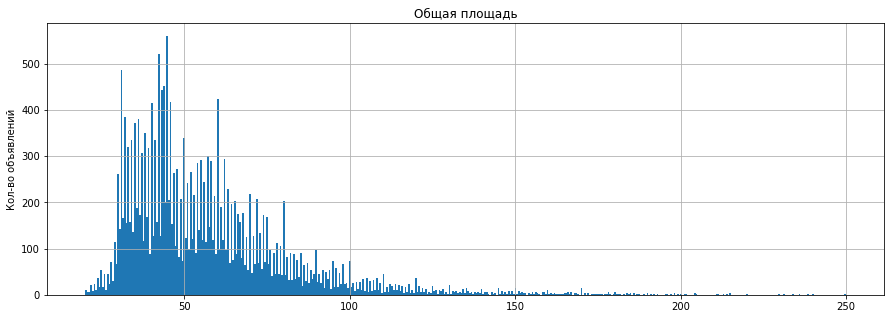

In [142]:
data['total_area'].hist(bins=450, figsize = (15,5))
plt.title('Общая площадь')
plt.ylabel('Кол-во объявлений')
plt.show()

<AxesSubplot:>

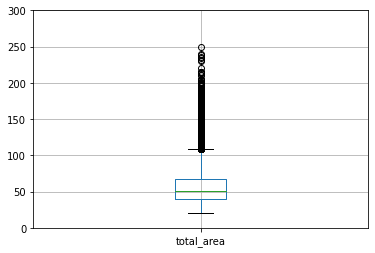

In [143]:
plt.ylim(0, 300)
data.boxplot('total_area')

Больше всего объявлений от 30 до 70 м.кв квартиры

In [144]:
import matplotlib.pyplot as plt

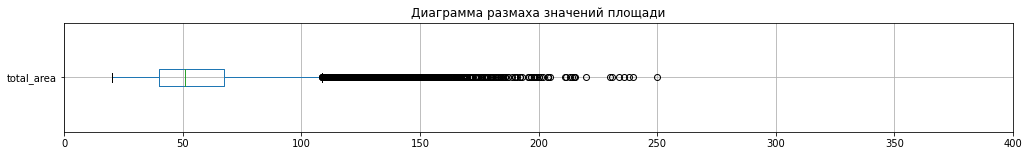

In [145]:
# для примера горизонтальный вид диаграммы размаха

fig, ax = plt.subplots(figsize = (17,2))
ax = data[['total_area']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений площади')
ax.set_xlim(0, 400);

Изучаем жилую площадь

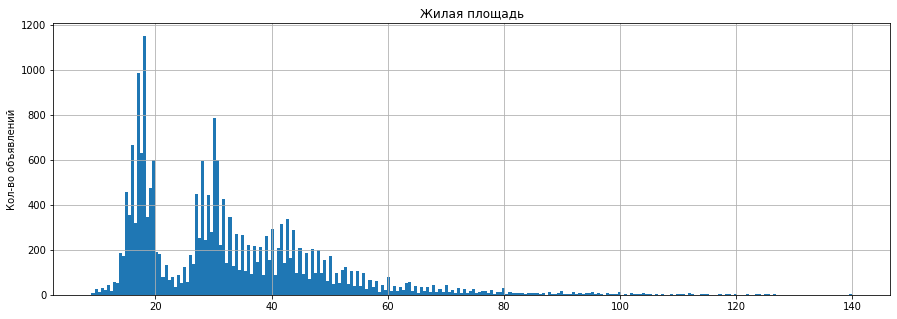

In [146]:
data['living_area'].hist(bins=250, figsize = (15,5))
plt.title('Жилая площадь')
plt.ylabel('Кол-во объявлений')
plt.show()

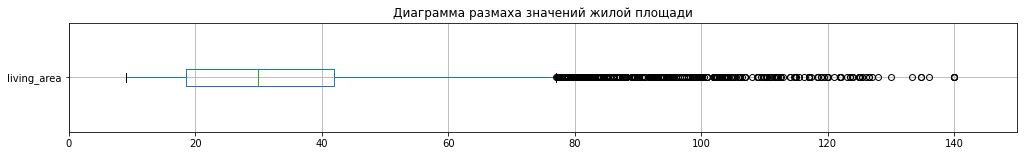

In [147]:
fig, ax = plt.subplots(figsize = (17,2))
ax = data[['living_area']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений жилой площади')
ax.set_xlim(0, 150);

Больше всего объявлений 30 м.кв жилой площади квартиры

Изучаем площадь кухни

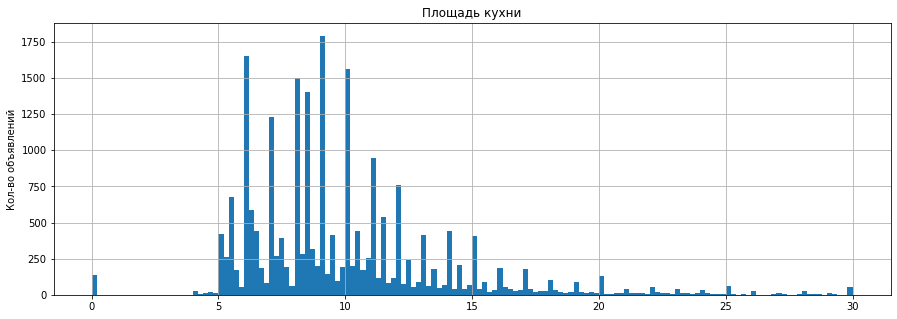

In [148]:
data['kitchen_area'].hist(bins=150, figsize = (15,5))
plt.title('Площадь кухни')
plt.ylabel('Кол-во объявлений')
plt.show()

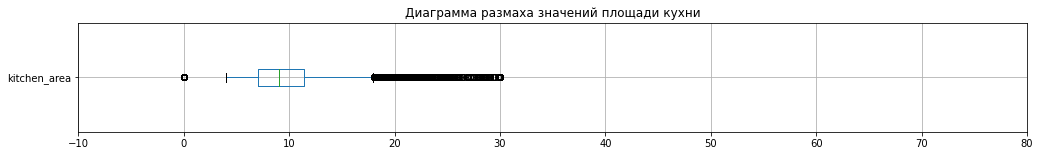

In [149]:
fig, ax = plt.subplots(figsize = (17,2))
ax = data[['kitchen_area']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений площади кухни')
ax.set_xlim(-10, 80);

Больше всего объявлений от 7 до 12 м.кв кухни квартиры

Изучаем цену объекта

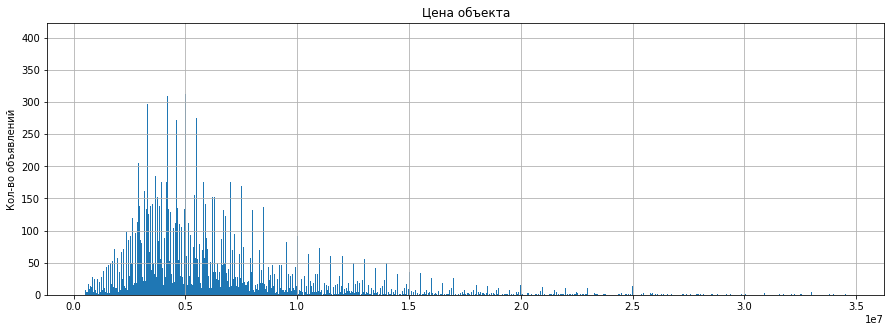

In [150]:
data['last_price'].hist(bins=1100, figsize = (15,5))
plt.title('Цена объекта')
plt.ylabel('Кол-во объявлений')
plt.show()

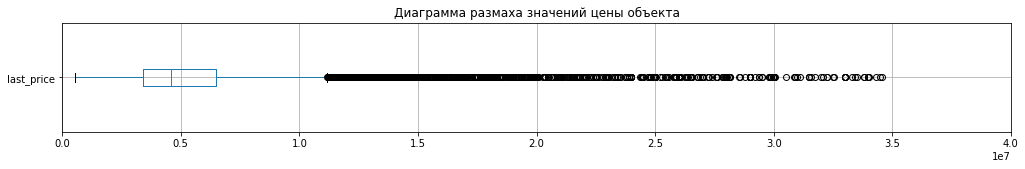

In [151]:
fig, ax = plt.subplots(figsize = (17,2))
ax = data[['last_price']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений цены объекта')
ax.set_xlim(0, 40000000);

Больше всего квартир от 3 до 7 миллионов

Изучаем количество комнат

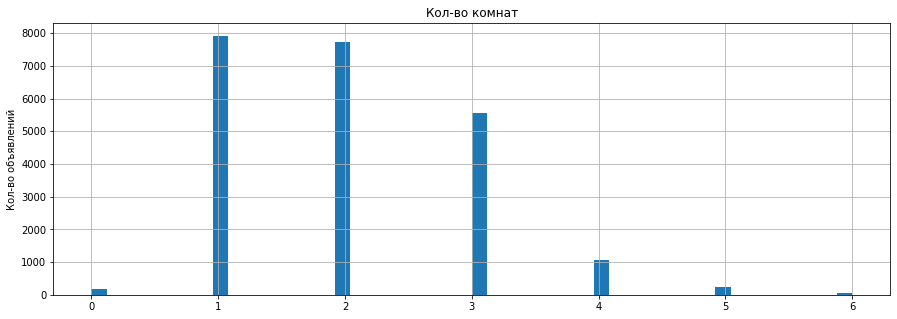

In [152]:
data['rooms'].hist(bins=50, figsize = (15,5))
plt.title('Кол-во комнат')
plt.ylabel('Кол-во объявлений')
plt.show()

Объявлений 1 - 2-х комнатами квартирами больше всего  

Изучаем высоту потолков

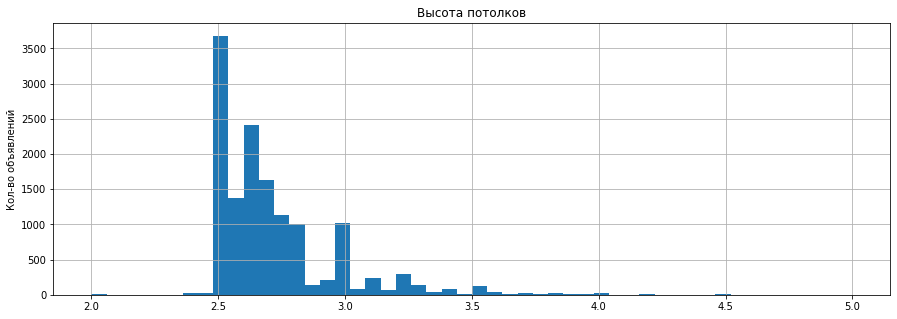

In [153]:
data['ceiling_height'].hist(bins=50, figsize = (15,5))
plt.title('Высота потолков')
plt.ylabel('Кол-во объявлений')
plt.show()

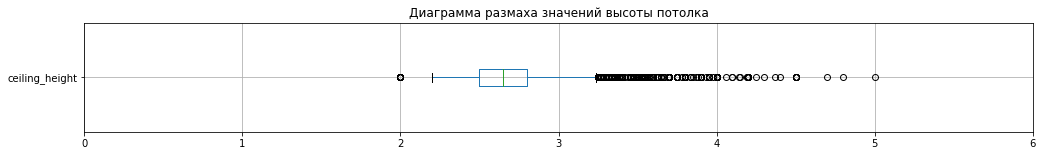

In [154]:
fig, ax = plt.subplots(figsize = (17,2))
ax = data[['ceiling_height']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений высоты потолка')
ax.set_xlim(0, 6);

Чаще всего высота потолков 2,5 м

Иследуем этаж квартиры

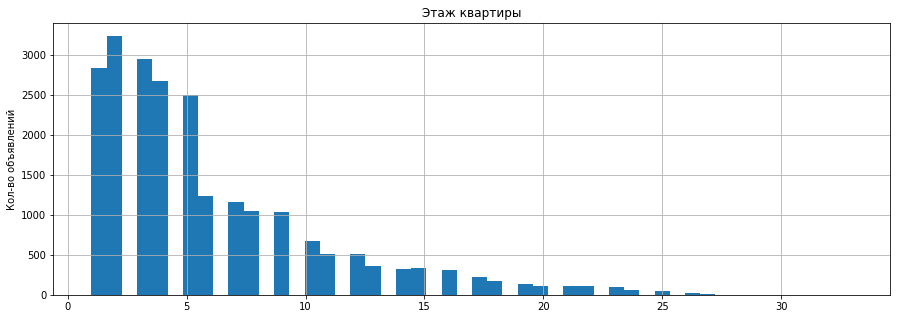

In [155]:
data['floor'].hist(bins=50, figsize = (15,5))
plt.title('Этаж квартиры')
plt.ylabel('Кол-во объявлений')
plt.show()

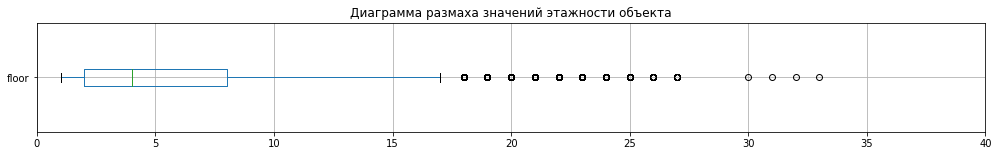

In [156]:
fig, ax = plt.subplots(figsize = (17,2))
ax = data[['floor']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений этажности объекта')
ax.set_xlim(0, 40);


Чаще всего объявления с 1 по 8 этаж

Изучаем тип этажа квартир

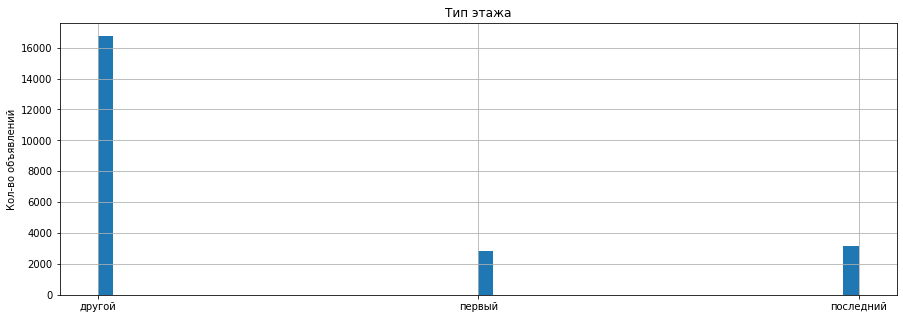

In [157]:
data['number_floor'].hist(bins=50, figsize = (15,5))
plt.title('Тип этажа')
plt.ylabel('Кол-во объявлений')
plt.show()

Чаще все тип этажей "другой"

Изучаем общее количество этажей в доме

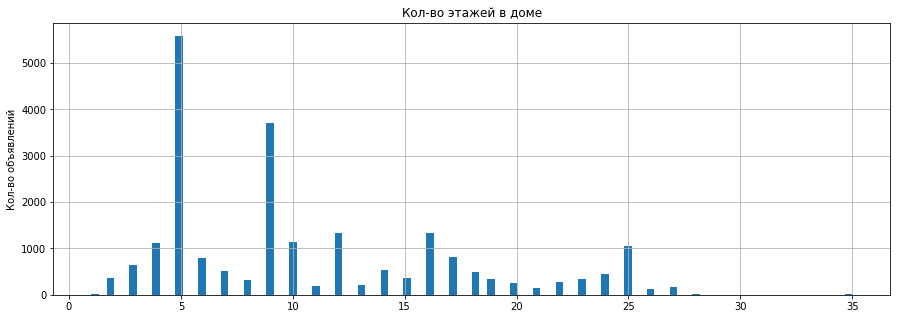

In [158]:
data['floors_total'].hist(bins=100, figsize = (15,5))
plt.title('Кол-во этажей в доме')
plt.ylabel('Кол-во объявлений')
plt.show()

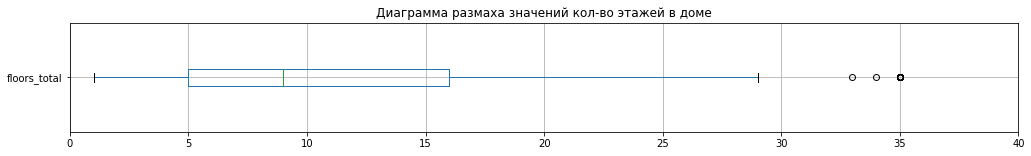

In [159]:
fig, ax = plt.subplots(figsize = (17,2))
ax = data[['floors_total']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений кол-во этажей в доме')
ax.set_xlim(0, 40);

Больше всего объявлений от 5 до 17-ти этажных домов

Изучаем расстояние до города в метрах

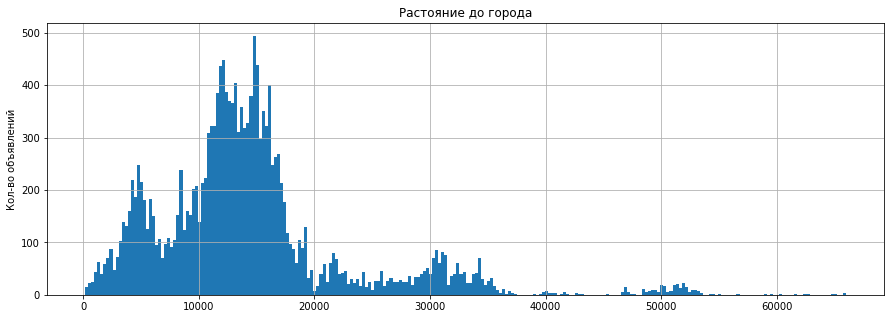

In [160]:
data['cityCenters_nearest'].hist(bins=250, figsize = (15,5))
plt.title('Растояние до города')
plt.ylabel('Кол-во объявлений')
plt.show()

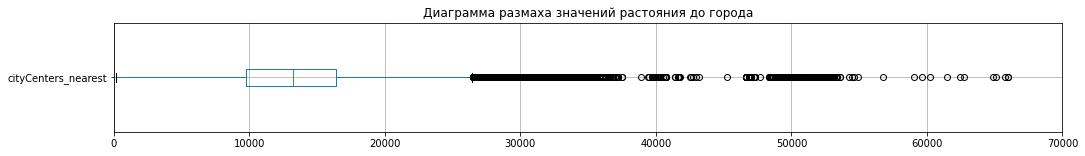

In [161]:
fig, ax = plt.subplots(figsize = (17,2))
ax = data[['cityCenters_nearest']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений растояния до города')
ax.set_xlim(0, 70000);

Больше всего объявлений от 10 до 17 км

Изучаем растояние до аэропорта

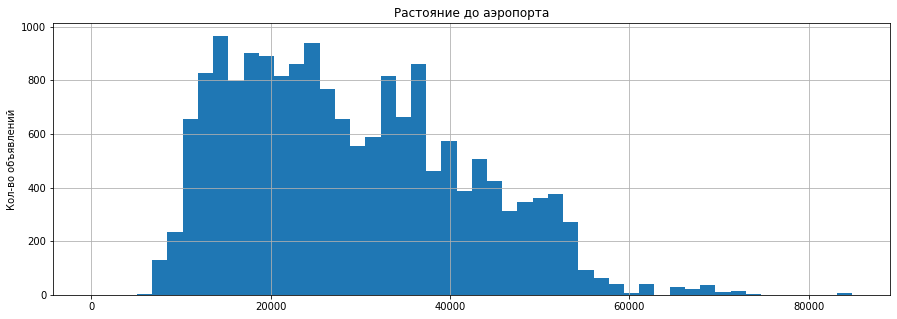

In [162]:
data['airports_nearest'].hist(bins=50, figsize = (15,5))
plt.title('Растояние до аэропорта')
plt.ylabel('Кол-во объявлений')
plt.show()

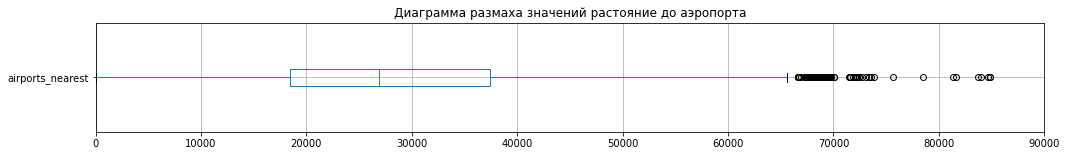

In [163]:
fig, ax = plt.subplots(figsize = (17,2))
ax = data[['airports_nearest']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений растояние до аэропорта')
ax.set_xlim(0, 90000);

Больше всего объявлений от 18 до 38 км

Изучаем расстояние до ближайщего парка

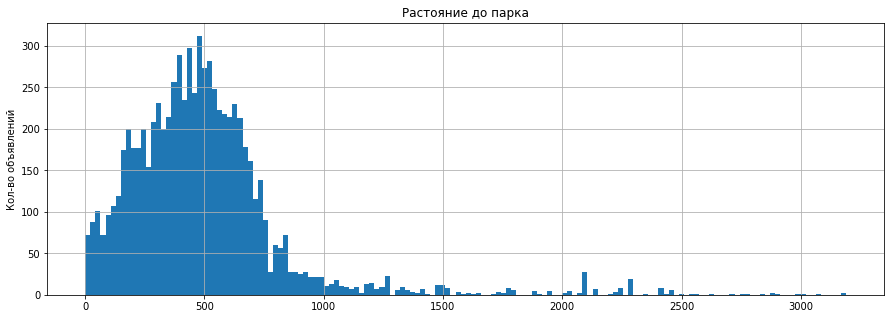

In [164]:
data['parks_nearest'].hist(bins=150, figsize = (15,5))
plt.title('Растояние до парка')
plt.ylabel('Кол-во объявлений')
plt.show()

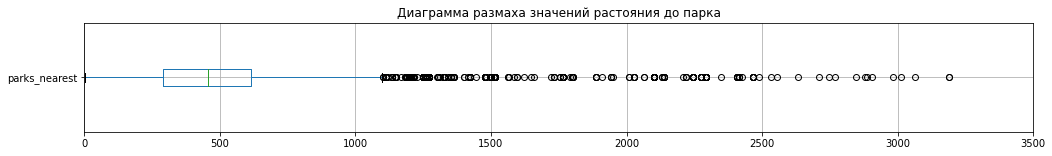

In [165]:
fig, ax = plt.subplots(figsize = (17,2))
ax = data[['parks_nearest']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений растояния до парка')
ax.set_xlim(0, 3500);

Больше всего объявлений с расстоянием до парка от 100 до 700 метров

Изучаем день публикации

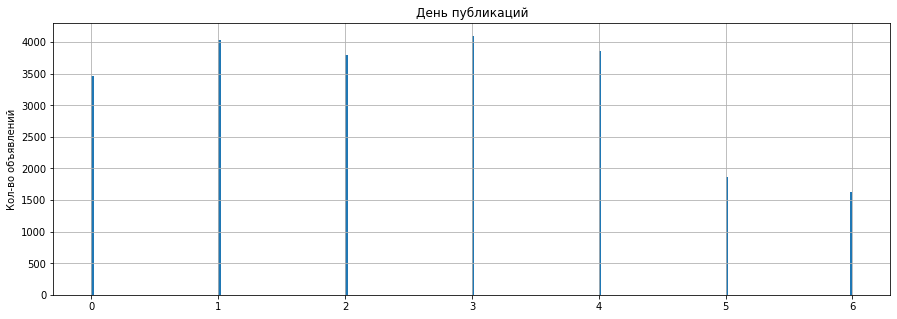

In [166]:
data['first_weekday_exposition'].hist(bins=300, figsize = (15,5))
plt.title('День публикаций')
plt.ylabel('Кол-во объявлений')
plt.show()

Больше всего объявлений с понедельника по пятницу

Изучаем месяц публикаций

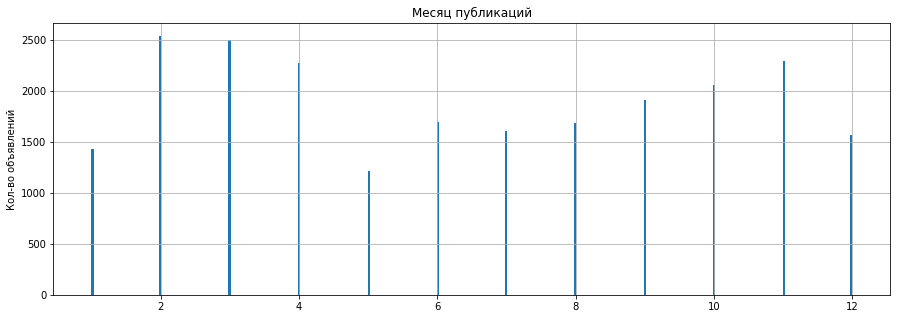

In [167]:
data['month_exposition'].hist(bins=350, figsize = (15,5))
plt.title('Месяц публикаций')
plt.ylabel('Кол-во объявлений')
plt.show()

Больше всего объявлений приходиться на февраль, март и апрель

#### Проведите исследовательский анализ данных

Изучаем как быстро продовались квартиры

Считаем медиану

In [168]:
data['days_exposition'].median()


93.0

Считаем среднею 

In [169]:
data['days_exposition'].mean()

173.56208554796254

In [170]:
data['days_exposition'].describe(percentiles=[0.1, 0.25, 0.5, 0.6, 0.75, 0.8, 0.9, 0.99]).T

count    19755.000000
mean       173.562086
std        204.009609
min          3.000000
10%         17.000000
25%         44.000000
50%         93.000000
60%        132.000000
75%        225.000000
80%        279.000000
90%        443.000000
99%        974.000000
max       1200.000000
Name: days_exposition, dtype: float64

In [171]:
data[data['days_exposition']>0]['days_exposition']

1         81.0
2        558.0
5         55.0
6        155.0
8        189.0
         ...  
23691    519.0
23692    413.0
23693    239.0
23695     45.0
23697    602.0
Name: days_exposition, Length: 19755, dtype: float64

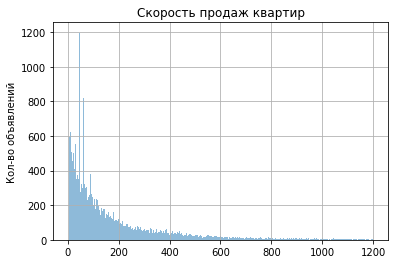

In [172]:

data['days_exposition'].hist(bins = 300, alpha=0.5)
plt.title('Скорость продаж квартир')
plt.ylabel('Кол-во объявлений')
plt.show()

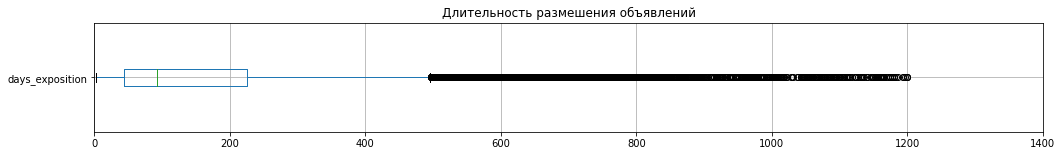

In [173]:
fig, ax = plt.subplots(figsize = (17,2))
ax = data[['days_exposition']].boxplot(vert = False, ax =ax)
ax.set_title('Длительность размешения объявлений')
ax.set_xlim(0, 1400);

Основные продажи происходят около 60 дней

Выевляем какие факторы влияют на стоимость 

In [174]:
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,l_area,days_exposition_duration,price_square_meter,first_weekday_exposition,month_exposition,year_exposition,number_floor,distance_to_center
0,20,13000000,108.00,2019-03-07,3,2.7,16.0,51.0,8,False,...,755.0,NaN,E,стандартные,120370.37,3,3,2019,другой,16.0
1,7,3350000,40.40,2018-12-04,1,NaN,11.0,18.6,1,False,...,NaN,81.0,B,стандартные,82920.79,1,12,2018,первый,19.0
2,10,5196000,56.00,2015-08-20,2,NaN,5.0,34.3,4,False,...,574.0,558.0,C,долгие,92785.71,3,8,2015,другой,14.0
5,10,2890000,30.40,2018-09-10,1,NaN,12.0,14.4,5,False,...,NaN,55.0,None,стандартные,95065.79,0,9,2018,другой,NaN
6,6,3700000,37.30,2017-11-02,1,NaN,26.0,10.6,6,False,...,NaN,155.0,B,стандартные,99195.71,3,11,2017,другой,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133.81,2017-03-21,3,3.7,5.0,73.3,3,False,...,381.0,NaN,F,стандартные,72490.85,1,3,2017,другой,4.0
23695,14,3100000,59.00,2018-01-15,3,NaN,5.0,38.0,4,False,...,NaN,45.0,C,стандартные,52542.37,0,1,2018,другой,NaN
23696,18,2500000,56.70,2018-02-11,2,NaN,3.0,29.7,1,False,...,NaN,NaN,C,стандартные,44091.71,6,2,2018,первый,NaN
23697,13,11475000,76.75,2017-03-28,2,3.0,17.0,NaN,12,False,...,196.0,602.0,D,долгие,149511.40,1,3,2017,другой,10.0


In [175]:
data_multi=data[['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms', 'airports_nearest', \
                 'balcony', 'ceiling_height', 'cityCenters_nearest', 'floor', 'floors_total', 'is_apartment', \
                 'locality_name', 'parks_around3000', 'parks_nearest', 'ponds_around3000',\
                 'ponds_nearest', 'total_images', 'price_square_meter','distance_to_center']].corr()
data_multi

,last_price,total_area,living_area,kitchen_area,rooms,airports_nearest,balcony,ceiling_height,cityCenters_nearest,floor,floors_total,is_apartment,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,total_images,price_square_meter,distance_to_center
last_price,1.000000,0.774765,0.676350,0.561642,0.489195,-0.037724,0.040203,0.495170,-0.342019,0.079482,0.086634,0.019481,0.183515,0.043676,0.191311,-0.098124,0.150434,0.679845,-0.342874
total_area,0.774765,1.000000,0.930343,0.555726,0.792816,-0.027610,0.035333,0.444895,-0.217180,-0.026122,-0.047202,0.014309,0.129148,0.010426,0.143865,-0.062565,0.110946,0.139581,-0.217584
living_area,0.676350,0.930343,1.000000,0.332090,0.877465,-0.056065,0.002015,0.396852,-0.210623,-0.115466,-0.169768,0.006662,0.145849,-0.033398,0.121193,-0.045793,0.101928,0.049388,-0.210834
kitchen_area,0.561642,0.555726,0.332090,1.000000,0.219795,0.019642,0.070843,0.396010,-0.172810,0.171115,0.238176,0.017683,0.042692,0.070342,0.129930,-0.075534,0.087426,0.298688,-0.173558
rooms,0.489195,0.792816,0.877465,0.219795,1.000000,-0.055933,-0.006022,0.227385,-0.150429,-0.162288,-0.226628,-0.008412,0.101530,-0.042027,0.067421,-0.031769,0.091939,-0.075921,-0.150312
airports_nearest,-0.037724,-0.027610,-0.056065,0.019642,-0.055933,1.000000,0.050121,-0.101167,0.268836,0.072074,0.105412,0.022941,0.009692,-0.082867,-0.050283,0.011477,-0.000563,-0.042600,0.269270
balcony,0.040203,0.035333,0.002015,0.070843,-0.006022,0.050121,1.000000,-0.075547,0.062938,0.170507,0.172217,0.029587,-0.078252,0.032067,-0.043577,0.022000,0.045778,0.035134,0.063102
ceiling_height,0.495170,0.444895,0.396852,0.396010,0.227385,-0.101167,-0.075547,1.000000,-0.350190,-0.039780,-0.070750,0.060344,0.244994,-0.045541,0.229956,-0.129750,0.026586,0.339522,-0.350792
cityCenters_nearest,-0.342019,-0.217180,-0.210623,-0.172810,-0.150429,0.268836,0.062938,-0.350190,1.000000,0.001291,0.000534,0.018090,-0.141101,-0.052463,-0.052128,0.013287,-0.039702,-0.378779,0.999448
floor,0.079482,-0.026122,-0.115466,0.171115,-0.162288,0.072074,0.170507,-0.039780,0.001291,1.000000,0.677096,-0.012757,-0.161781,0.076345,-0.074741,0.027225,0.031165,0.194981,0.000817


,last_price,total_area
last_price,1.000000,0.774765
total_area,0.774765,1.000000


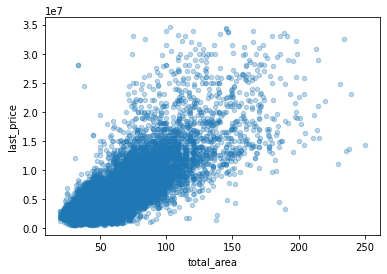

In [176]:
data.plot(x='total_area', y='last_price',  kind='scatter', alpha=0.3)
data[['last_price','total_area']].corr()

По графику и корреляции видна зависимость от площади

,last_price,living_area
last_price,1.00000,0.67635
living_area,0.67635,1.00000


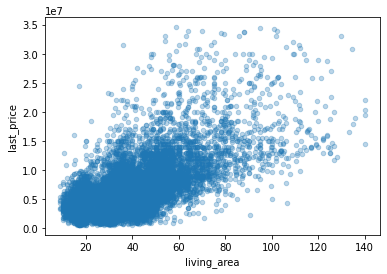

In [177]:
data.plot(x='living_area', y='last_price',  kind='scatter', alpha=0.3)
data[['last_price','living_area']].corr()

По графику и корреляции видна зависимость от жилой площади

,last_price,kitchen_area
last_price,1.000000,0.561642
kitchen_area,0.561642,1.000000


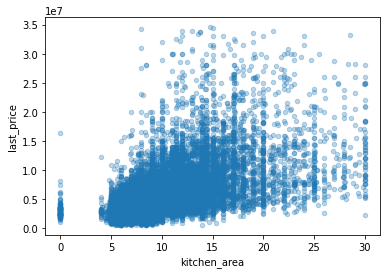

In [178]:
data.plot(x='kitchen_area', y='last_price',  kind='scatter', alpha=0.3)
data[['last_price','kitchen_area']].corr()

По графику и корреляции видна зависимость от кухоной площади

,last_price,rooms
last_price,1.000000,0.489195
rooms,0.489195,1.000000


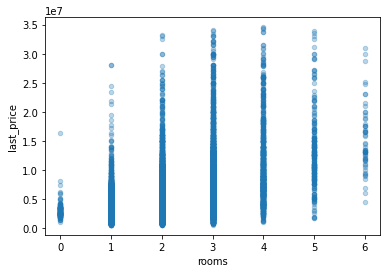

In [179]:
data.plot(x='rooms', y='last_price',  kind='scatter', alpha=0.3)
data[['last_price','rooms']].corr()

По графику и корреляции видна зависимость от количество комнат

,last_price
last_price,1.0


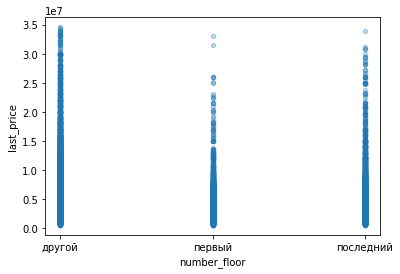

In [180]:
data.plot(x='number_floor', y='last_price',  kind='scatter', alpha=0.3)
data[['last_price','number_floor']].corr()

По графику и корреляции видно что квартиры первых этажах дешевле всего 

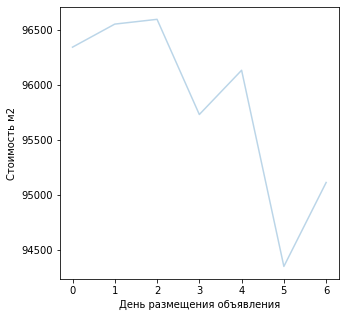

In [181]:
price_weekday=data.groupby('first_weekday_exposition')['price_square_meter'].mean()
price_weekday.plot(x='first_weekday_exposition', y='last_price',  kind='line',figsize=(5,5), alpha=0.3,\
          xlabel='День размещения объявления', ylabel='Стоимость м2')
plt.show()

По графику и корреляции видно что цена в будни выше чем в выходные дни

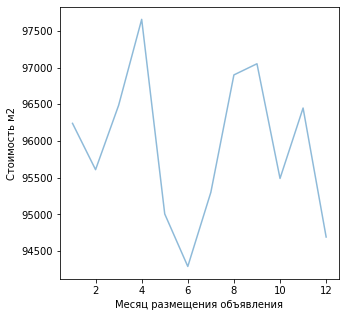

In [182]:
price_month=data.groupby('month_exposition')['price_square_meter'].mean()
price_month.plot(x='month_exposition', y='last_price',  kind='line',figsize=(5,5), alpha=0.5,\
          xlabel='Месяц размещения объявления', ylabel='Стоимость м2')
plt.show()

По графику и корреляции видно что пик цен на апрель 

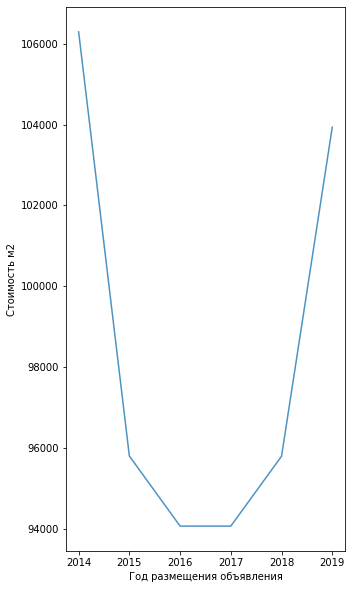

In [183]:
price_year=data.groupby('year_exposition')['price_square_meter'].mean()
price_year.plot(x='year_exposition', y='price_square_meter',  kind='line',figsize=(5,10), alpha=0.8,\
          xlabel='Год размещения объявления', ylabel='Стоимость м2')
plt.show()

2016 год цена сильно упала, в 2017 осталась на прежнем уровне и потом опять начала расти

Средняя цена 1 м2 в 10 населенных пунктах

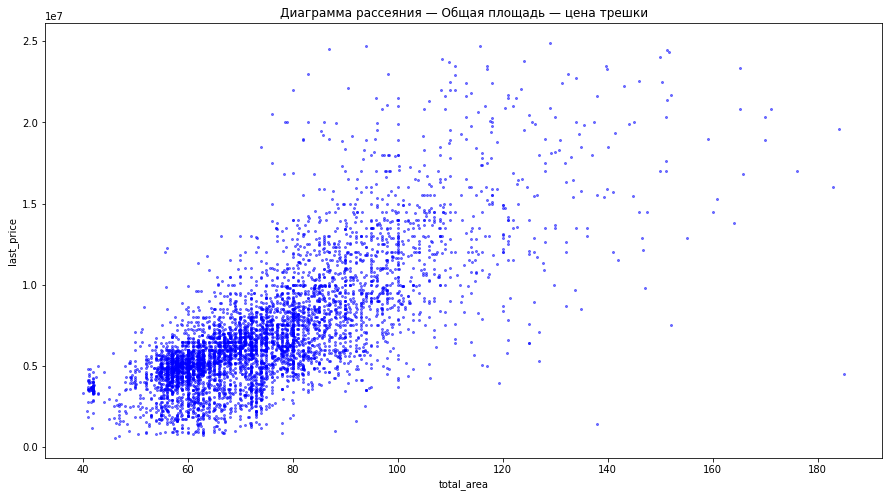

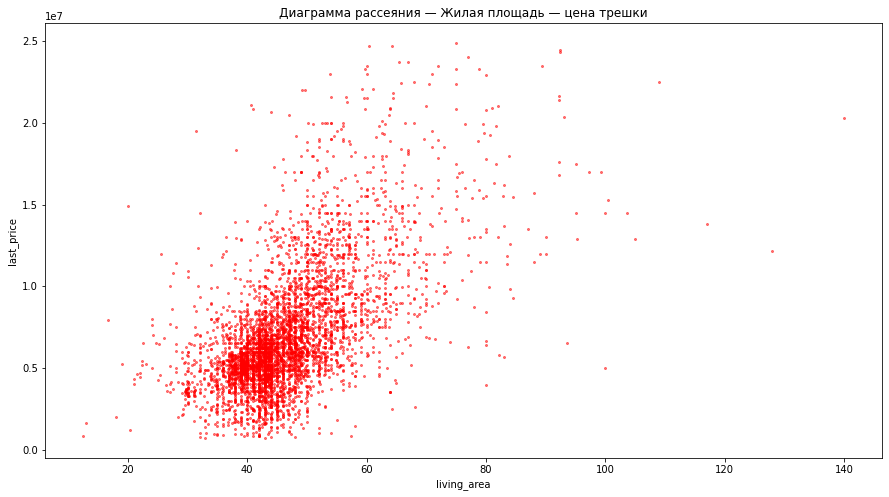

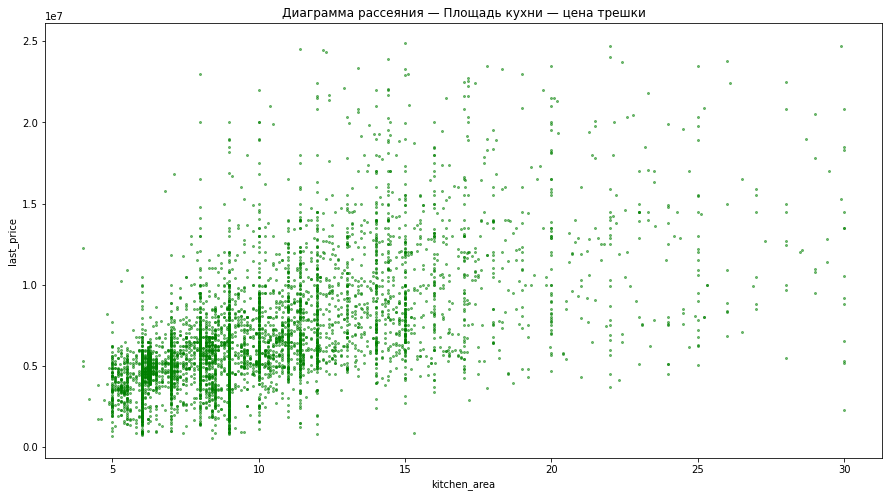

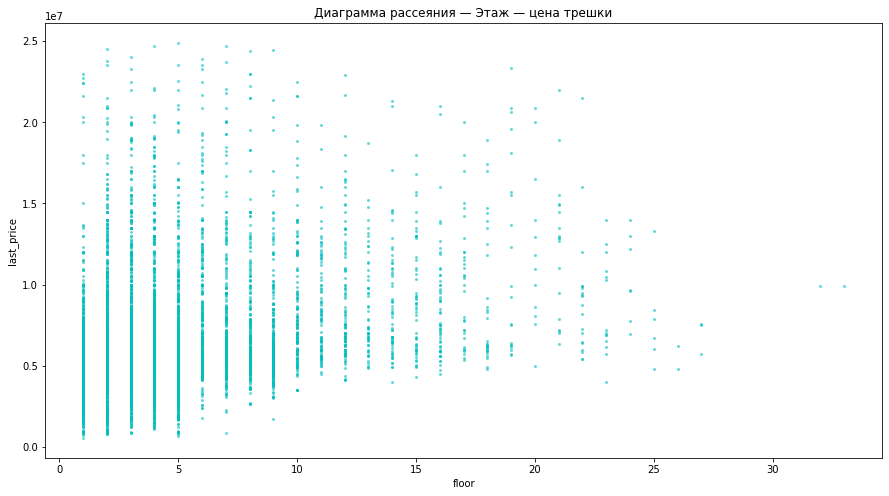

In [184]:
# цена-общая площадь
data[data['rooms'] == 3].query('total_area < 201 and last_price < 25_000_000').plot(kind='scatter',
        y='last_price' , x='total_area', alpha=0.5, subplots=True, figsize=(15,8), c = 'b', s = 4)
plt.title('Диаграмма рассеяния — Общая площадь — цена трешки')

# цена-жилая площадь
data[data['rooms'] == 3].query('total_area < 201 and last_price < 25_000_000').plot(kind='scatter', 
        y='last_price' , x='living_area', alpha=0.5, figsize=(15,8), c = 'r', s = 4)
plt.title('Диаграмма рассеяния — Жилая площадь — цена трешки');

# цена-площадь кухни
data[data['rooms'] == 3].query('total_area < 201 and last_price < 25_000_000').plot(kind='scatter', 
        y='last_price' , x='kitchen_area', alpha=0.5, figsize=(15,8), c = 'g', s = 4)
plt.title('Диаграмма рассеяния — Площадь кухни — цена трешки');

# цена-этаж
data[data['rooms'] == 3].query('total_area < 201 and last_price < 25_000_000').plot(kind='scatter', 
        y='last_price' , x='floor', alpha=0.5, figsize=(15,8), c = 'c', s = 4)
plt.title('Диаграмма рассеяния — Этаж — цена трешки');


In [185]:
mean_last=data.groupby('year_exposition')['last_price'].mean()

In [186]:
mean_last

year_exposition
2014    8.615321e+06
2015    6.303696e+06
2016    5.646872e+06
2017    5.508985e+06
2018    5.451006e+06
2019    5.921874e+06
Name: last_price, dtype: float64

<AxesSubplot:>

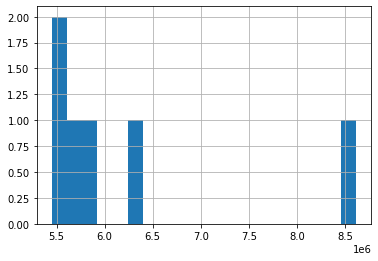

In [187]:
mean_last.hist(bins= 20)

In [188]:
mean_total=data.groupby('year_exposition')['total_area'].mean()

In [189]:
mean_total

year_exposition
2014    76.195657
2015    64.112584
2016    58.624878
2017    57.064911
2018    55.770568
2019    56.133412
Name: total_area, dtype: float64

<AxesSubplot:>

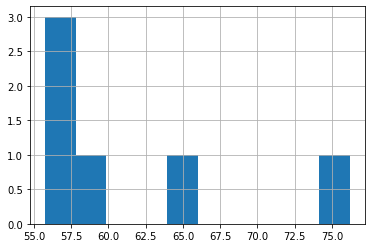

In [190]:
mean_total.hist(bins=10)

In [191]:
count_total=data.groupby('year_exposition')['total_area'].count()

In [192]:
count_total

year_exposition
2014      99
2015    1037
2016    2661
2017    7906
2018    8286
2019    2770
Name: total_area, dtype: int64

<AxesSubplot:>

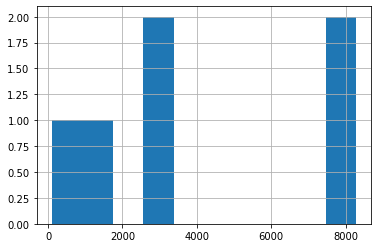

In [193]:
count_total.hist(bins=10)

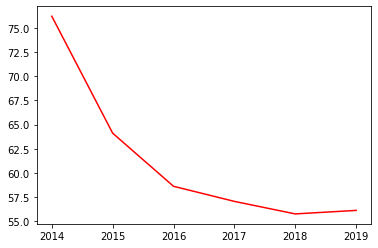

In [194]:
x = [2014,2015,2016,2017,2018,2019]
f1 = mean_total

plt.plot(x, f1, 'r')    
   

plt.show()

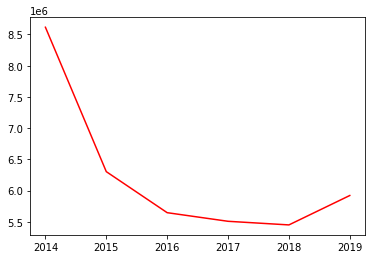

In [195]:
x = [2014,2015,2016,2017,2018,2019]
f1 = mean_last

plt.plot(x, f1, 'r')    
   

plt.show()

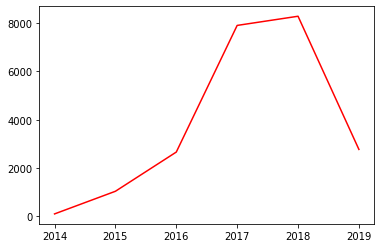

In [196]:
x = [2014,2015,2016,2017,2018,2019]
f1 = count_total

plt.plot(x, f1, 'r')    
   

plt.show()

 **Вывод:** Проанализировав цену трехкомнатных квартир, видна зависимость от общей и жилой площади и площади кухни

Падение цены произошло из всплеска продоваемых квартир и увеличения площади

Находим города с самой высокой ценой

In [197]:
goroda=data.pivot_table(index='locality_name', values='price_square_meter', aggfunc=['mean', 'count'])
goroda.columns=['price_square_meter_mean', 'gorod_count']
goroda=round(goroda,2)
goroda.sort_values(by= 'gorod_count', ascending = False).head(10)


,price_square_meter_mean,gorod_count
locality_name,,
Санкт-Петербург,110241.20,14943
поселок Мурино,85499.16,546
поселок Шушары,78606.07,436
Всеволожск,68630.29,396
Пушкин,102673.48,356
Колпино,75333.30,337
поселок Парголово,90259.74,325
Гатчина,68687.80,305
деревня Кудрово,92542.25,298


In [198]:
top_goroda=goroda.sort_values(by= 'gorod_count', ascending = False).head(10)
top_goroda=round(top_goroda,2)
top_goroda.sort_values(by= 'price_square_meter_mean', ascending = False).head(10)

,price_square_meter_mean,gorod_count
locality_name,,
Санкт-Петербург,110241.20,14943
Пушкин,102673.48,356
деревня Кудрово,92542.25,298
поселок Парголово,90259.74,325
поселок Мурино,85499.16,546
поселок Шушары,78606.07,436
Колпино,75333.30,337
Гатчина,68687.80,305
Всеволожск,68630.29,396


Находим города с самой низкой ценой

In [199]:
notop_goroda=goroda.sort_values(by= 'gorod_count').head(10)
notop_goroda=round(notop_goroda,2)
notop_goroda.sort_values(by= 'price_square_meter_mean').head(10)

,price_square_meter_mean,gorod_count
locality_name,,
деревня Ям-Тесово,15094.34,1
поселок Плоское,20912.55,1
деревня Куровицы,22593.32,1
деревня Курковицы,25606.47,1
поселок Платформа 69-й километр,25616.70,1
село Шум,33898.31,1
поселок Калитино,37977.10,1
деревня Лаврики,51551.48,1
деревня Лупполово,61366.34,1


Строим график распределение цены за 1 м2 по населенным пунктам

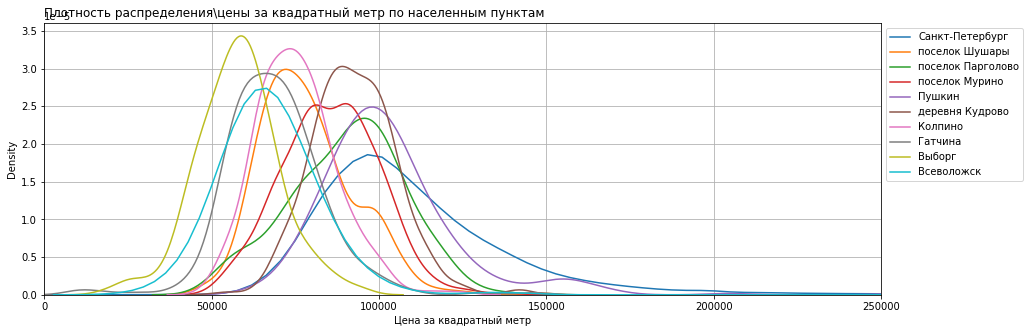

In [200]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(15, 5)) 
# 10 населённых пунктов с наибольшим числом объявлений

top_goroda = data[data.locality_name.isin(data.locality_name.value_counts().index[:10])]
# Пишем функцию
for locality in top_goroda.locality_name.unique():
    sns.kdeplot(top_goroda[top_goroda.locality_name == locality].price_square_meter, label = locality)
    
plt.grid(True) 
plt.legend(loc = 'upper left', bbox_to_anchor = (1,1)) 
plt.title('Плотность распределения\цены за квадратный метр по населенным пунктам', loc = 'left')
plt.xlabel('Цена за квадратный метр') # подпись оси x
plt.xlim((0,250000)) # ограничение значений оси X

plt.show()

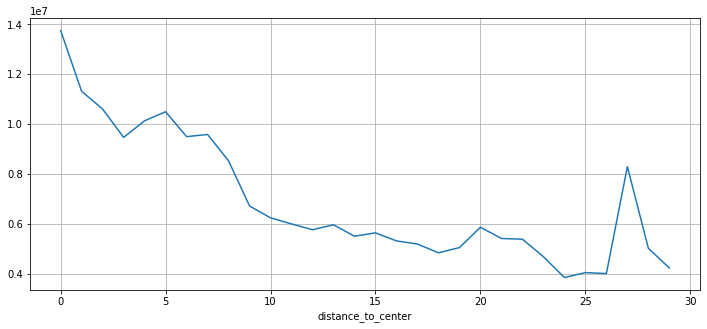

In [201]:
data_spb_mean = data.query('locality_name =="Санкт-Петербург" & distance_to_center >= 0 ') \
                     .groupby('distance_to_center')['last_price'].mean()\
                     .plot(grid=True, figsize=(12, 5))

**Вывод** самые дорогие места это в центре, потом идут всплески на 27км от центра так как это уже загородные участки

In [202]:
data_spb_means = data.query('locality_name =="Санкт-Петербург" & distance_to_center >= 27 ') 

In [203]:
data_spb_means

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,l_area,days_exposition_duration,price_square_meter,first_weekday_exposition,month_exposition,year_exposition,number_floor,distance_to_center
748,13,14350000,74.0,2017-11-28,2,3.13,5.0,30.0,3,False,...,NaN,128.0,D,стандартные,193918.92,1,11,2017,другой,27.0
814,0,7600000,111.0,2017-07-26,3,3.00,16.0,63.0,12,False,...,72.0,66.0,E,стандартные,68468.47,2,7,2017,другой,28.0
1111,0,4072000,38.0,2015-10-14,1,NaN,5.0,16.0,4,False,...,NaN,285.0,B,долгие,107157.89,2,10,2015,другой,28.0
5961,6,2250000,32.0,2018-02-27,1,NaN,2.0,16.5,2,False,...,NaN,178.0,B,стандартные,70312.50,1,2,2018,последний,27.0
9572,0,3413000,43.0,2015-11-10,1,NaN,5.0,18.0,1,False,...,NaN,258.0,B,долгие,79372.09,1,11,2015,первый,28.0
10798,10,4850000,62.0,2017-05-16,3,NaN,5.0,35.7,1,False,...,NaN,63.0,C,стандартные,78225.81,1,5,2017,первый,29.0
11652,16,4700000,51.0,2016-06-07,2,2.60,5.0,30.0,1,False,...,NaN,539.0,None,долгие,92156.86,1,6,2016,первый,29.0
12160,8,2450000,43.0,2018-08-14,1,2.75,5.0,16.0,1,True,...,NaN,8.0,B,быстрые,56976.74,1,8,2018,первый,29.0
13031,16,4200000,56.8,2018-07-04,2,3.50,3.0,27.9,1,False,...,NaN,187.0,C,стандартные,73943.66,2,7,2018,первый,29.0
16787,20,4850000,85.8,2019-04-22,3,3.60,3.0,49.4,2,False,...,NaN,NaN,D,стандартные,56526.81,0,4,2019,другой,29.0


Очень много пропусков в данных и неправильно занесенные 

In [204]:
# check
data.query('locality_name =="Санкт-Петербург" & distance_to_center == 27 ') 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,l_area,days_exposition_duration,price_square_meter,first_weekday_exposition,month_exposition,year_exposition,number_floor,distance_to_center
748,13,14350000,74.0,2017-11-28,2,3.13,5.0,30.0,3,False,...,NaN,128.0,D,стандартные,193918.92,1,11,2017,другой,27.0
5961,6,2250000,32.0,2018-02-27,1,NaN,2.0,16.5,2,False,...,NaN,178.0,B,стандартные,70312.50,1,2,2018,последний,27.0


### Общий вывод

Изучив данные архива Яндекс.Недвижимости с 2014 по 2019 год, выявил закономерность:
1. Огромное количество пропусков из за человеческого фактора
2. Цена зависет от колличество квадратных метров (общей, жилой, кухни), комнат.
3. Чем ближе к центру тем дороже квартиры
4. Выбрав топ 10 населенных пунктов со средней стоимостью за м2, мы видим, что цена находится в диапазоне 70К-120К в зависимости от места. Максимум в пунктах- Санкт-Петербург, Пушкин, Петергоф. Также есть выбросы от 200000.
5. Проанализировав рост цен по годам, можно сказать что было падение до 2016 года цены, после идет стогнация до 2017 года и потом рост цен

In [205]:
import seaborn as sns
import matplotlib.pyplot as plt

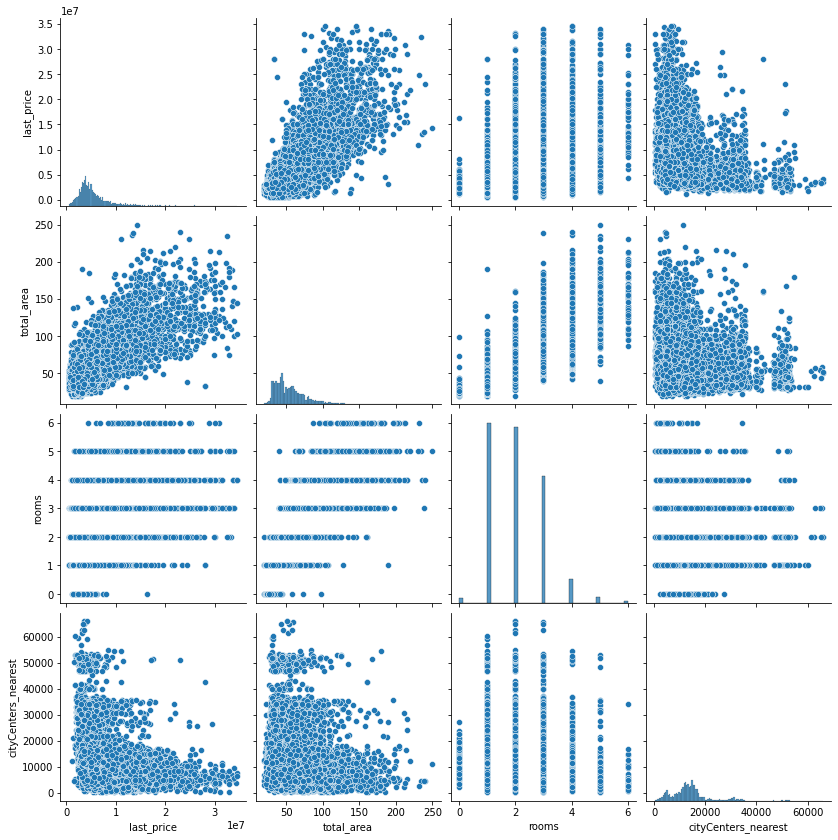

In [206]:
sns.pairplot(data[['last_price', 'total_area', 'rooms', 'cityCenters_nearest']])
plt.gcf().set_size_inches(12,12);


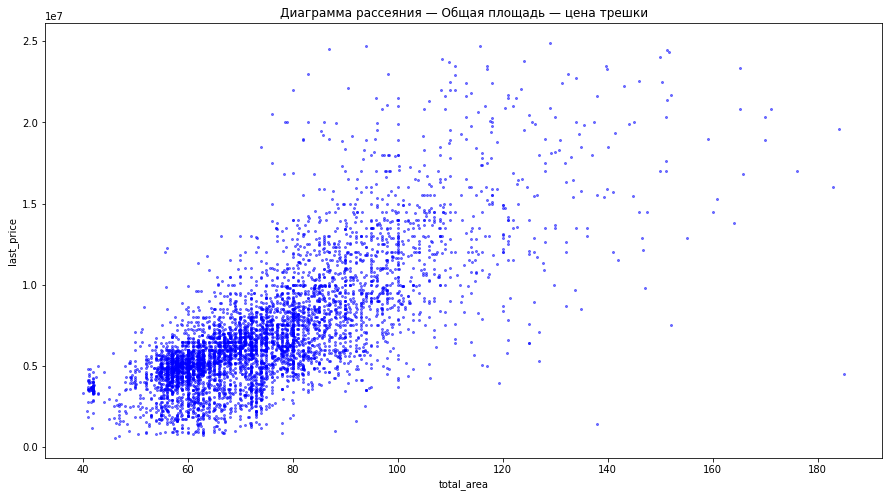

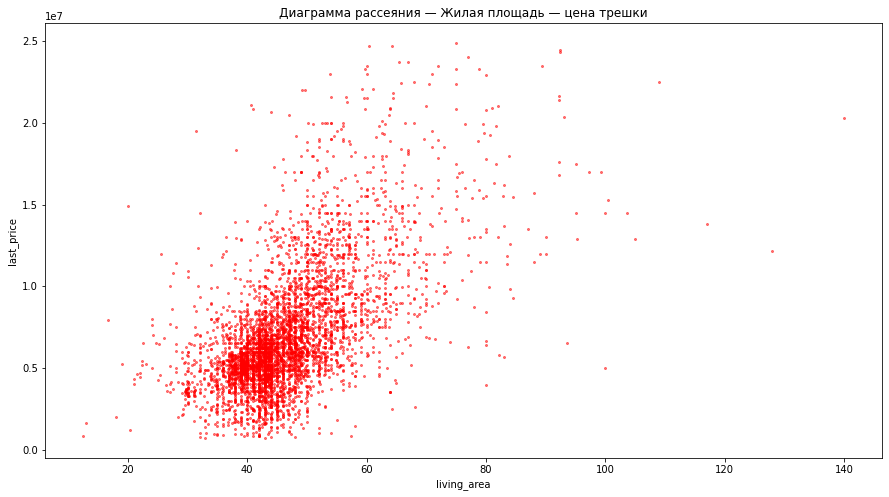

In [207]:
data[data['rooms'] == 3].query('total_area < 201 and last_price < 25_000_000').plot(kind='scatter',
        y='last_price' , x='total_area', alpha=0.5, subplots=True, figsize=(15,8), c = 'b', s = 4)
plt.title('Диаграмма рассеяния — Общая площадь — цена трешки')


data[data['rooms'] == 3].query('total_area < 201 and last_price < 25_000_000').plot(kind='scatter', 
        y='last_price' , x='living_area', alpha=0.5, figsize=(15,8), c = 'r', s = 4)
plt.title('Диаграмма рассеяния — Жилая площадь — цена трешки');

,last_price,kitchen_area,living_area,total_area
0,520000,5.50,18.00,30.0
1,530000,5.80,16.00,29.6
2,550000,6.75,19.00,35.5
3,560000,6.00,17.20,32.0
4,565000,9.00,25.00,45.0
...,...,...,...,...
2653,33990000,17.00,83.15,132.9
2654,34000000,12.00,70.00,120.0
2655,34315000,8.00,101.00,145.0
2656,34500000,15.00,95.00,145.0


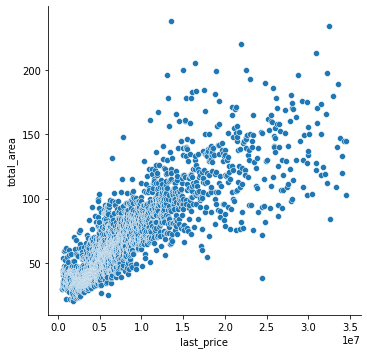

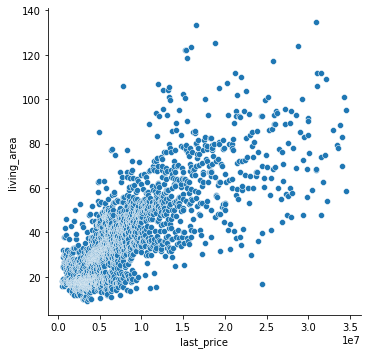

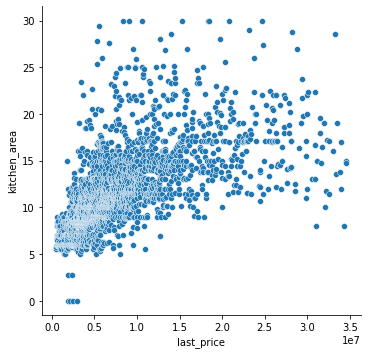

In [208]:
price_pivot_area = data.pivot_table(index='last_price', values=([
    'total_area', 'living_area', 'kitchen_area']), aggfunc='median')
price_pivot_area = price_pivot_area.reset_index()
# Посмотрим на диаграммы рассеяния для столбцов 'total_area', 'living_area', 'kitchen_area'.
for row in ['total_area', 'living_area', 'kitchen_area']:
    sns.relplot(data=price_pivot_area, x='last_price', y=row, kind='scatter')
price_pivot_area

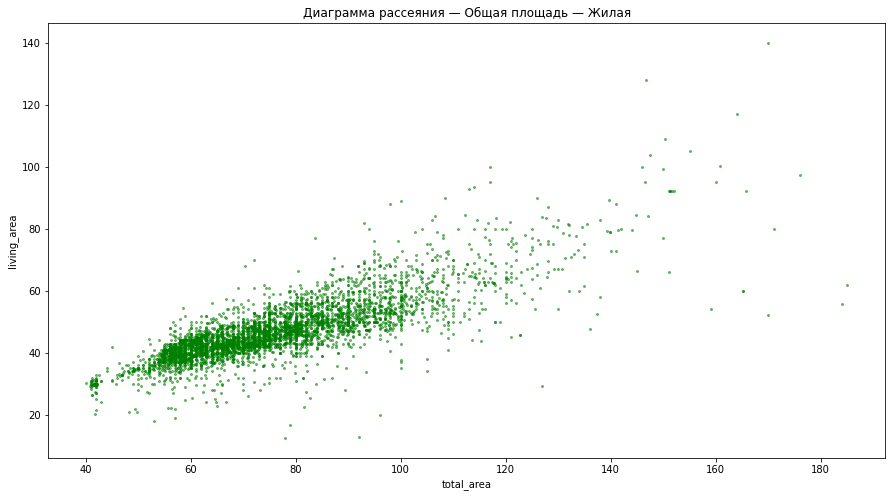

In [209]:
data[data['rooms'] == 3].query('total_area < 201 and last_price < 25_000_000').plot(kind='scatter',
        y='living_area' , x='total_area', alpha=0.5, subplots=True, figsize=(15,8), c = 'g', s = 4)
plt.title('Диаграмма рассеяния — Общая площадь — Жилая');

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x ]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x ]  определены пропущенные значения
- [ x]  заполнены пропущенные значения там, где это возможно
- [ ]  есть пояснение, какие пропущенные значения обнаружены
- [ ]  изменены типы данных
- [ ]  есть пояснение, в каких столбцах изменены типы и почему
- [x ]  устранены неявные дубликаты в названиях населённых пунктов
- [x ]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [х]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [х ]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x ]  посчитано и добавлено в таблицу: месяц публикации объявления
- [ x]  посчитано и добавлено в таблицу: год публикации объявления
- [х ]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x ]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [х ]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [ х]  построены гистограммы для каждого параметра
- [ х]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [ х]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x ]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [ х]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [ х]  в каждом этапе есть промежуточные выводы
- [х ]  есть общий вывод